In [103]:
# Data representation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pxp
import plotly.graph_objs as gph
from yellowbrick.cluster import SilhouetteVisualizer
import graphviz

# Machine learning
from sklearn.preprocessing import LabelEncoder
import scipy.cluster.hierarchy as ch
from scipy.spatial.distance import cdist

from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import  KMeans, MeanShift, estimate_bandwidth, AgglomerativeClustering, DBSCAN
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

import tensorflow as tf
from tensorflow import keras

# Train and Testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, silhouette_score, davies_bouldin_score

# Save and get model(s)
import pickle

import warnings
warnings.filterwarnings('ignore')

## Introduction

In this project, we will apply different stastistical methods, to try and analyse patterns and correlation in different lifestyle factors. This will involve trying to train different machine learning models, to see how precisely these patterns can be used to predict how much carbon is emitted based on the correlating factors.
We will try to answer the following questions: 

- Which are the most decisive factors for carbon emissions for an individual?
- Does internet usage directly affect total carbon emissions?
- Does the important factors differ between males and females?
- Does people who see themselves as "energy efficient" generally have lower total carbon emissions?
- Are the people travelling frequently by plane, the ones who are emitting the most carbon?
- Which machine learning methods did you choose to apply in the application?
- How accurate is your solution of prediction?
- Which were the challenges in the project development?

# Data Preparation

### Data Collection / loading:

In [104]:
# Reading the data from csv into pandas dataframe:
df = pd.read_csv('./data/Carbon-Emission.csv', index_col=None, na_values=['NA'])

In [105]:
# Viewing the size of the dataframe:
df.shape

(10000, 20)

In [106]:
df.sample(5)

Body Type     Sex         Diet How Often Shower Heating Energy Source  \
8783      normal  female  pescatarian  less frequently                  coal   
7002  overweight  female        vegan            daily           natural gas   
4011  overweight  female  pescatarian  more frequently           natural gas   
9233       obese  female  pescatarian            daily                  wood   
6925  overweight    male  pescatarian  more frequently           natural gas   

         Transport Vehicle Type Social Activity  Monthly Grocery Bill  \
8783        public          NaN           often                    88   
7002  walk/bicycle          NaN           often                   119   
4011  walk/bicycle          NaN       sometimes                   128   
9233       private       petrol           often                   177   
6925        public          NaN           never                   162   

     Frequency of Traveling by Air  Vehicle Monthly Distance Km  \
8783                         never                          406   
7002               very frequently                           40   
4011                        rarely                           47   
9233                    frequently                         7366   
6925                        rarely                         1498   

     Waste Bag Size  Waste Bag Weekly Count  How Long TV PC Daily Hour  \
8783          large                       7                         21   
7002          large                       6                          4   
4011    extra large                       7                          4   
9233          small                       4                         14   
6925          large                       4                         15   

      How Many New Clothes Monthly  How Long Internet Daily Hour  \
8783                            19                            22   
7002                            47                             8   
4011                            24                            24   
9233                            48                            12   
6925                            13                            19   

     Energy efficiency                      Recycling  \
8783               Yes  ['Paper', 'Plastic', 'Metal']   
7002         Sometimes  ['Paper', 'Plastic', 'Metal']   
4011                No  ['Plastic', 'Glass', 'Metal']   
9233         Sometimes                    ['Plastic']   
6925                No  ['Plastic', 'Glass', 'Metal']   

                                           Cooking_With  CarbonEmission  
8783                     ['Stove', 'Grill', 'Airfryer']            1558  
7002         ['Oven', 'Microwave', 'Grill', 'Airfryer']            2888  
4011  ['Stove', 'Oven', 'Microwave', 'Grill', 'Airfr...            2255  
9233                              ['Oven', 'Microwave']            5254  
6925                                                 []            1608

In [107]:
df.iloc[[7511]]

Body Type   Sex      Diet How Often Shower Heating Energy Source  \
7511     obese  male  omnivore            daily           electricity   

     Transport Vehicle Type Social Activity  Monthly Grocery Bill  \
7511    public          NaN           often                   195   

     Frequency of Traveling by Air  Vehicle Monthly Distance Km  \
7511                        rarely                          606   

     Waste Bag Size  Waste Bag Weekly Count  How Long TV PC Daily Hour  \
7511         medium                       2                          7   

      How Many New Clothes Monthly  How Long Internet Daily Hour  \
7511                            15                            24   

     Energy efficiency           Recycling                   Cooking_With  \
7511         Sometimes  ['Paper', 'Glass']  ['Oven', 'Grill', 'Airfryer']   

      CarbonEmission  
7511            1574

In [108]:
list(df)

['Body Type',
 'Sex',
 'Diet',
 'How Often Shower',
 'Heating Energy Source',
 'Transport',
 'Vehicle Type',
 'Social Activity',
 'Monthly Grocery Bill',
 'Frequency of Traveling by Air',
 'Vehicle Monthly Distance Km',
 'Waste Bag Size',
 'Waste Bag Weekly Count',
 'How Long TV PC Daily Hour',
 'How Many New Clothes Monthly',
 'How Long Internet Daily Hour',
 'Energy efficiency',
 'Recycling',
 'Cooking_With',
 'CarbonEmission']

In [109]:
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Body Type                      10000 non-null  object
 1   Sex                            10000 non-null  object
 2   Diet                           10000 non-null  object
 3   How Often Shower               10000 non-null  object
 4   Heating Energy Source          10000 non-null  object
 5   Transport                      10000 non-null  object
 6   Vehicle Type                   3279 non-null   object
 7   Social Activity                10000 non-null  object
 8   Monthly Grocery Bill           10000 non-null  int64 
 9   Frequency of Traveling by Air  10000 non-null  object
 10  Vehicle Monthly Distance Km    10000 non-null  int64 
 11  Waste Bag Size                 10000 non-null  object
 12  Waste Bag Weekly Count         10000 non-null  int64 
 13  Ho

In [110]:
# Replacing nan values with None, this we do beacuse we know/can see that pepole that dont drive has nan values as vehicle type
df = df.replace(np.nan, 'None')

In [111]:
df.isnull().sum()

Body Type                        0
Sex                              0
Diet                             0
How Often Shower                 0
Heating Energy Source            0
Transport                        0
Vehicle Type                     0
Social Activity                  0
Monthly Grocery Bill             0
Frequency of Traveling by Air    0
Vehicle Monthly Distance Km      0
Waste Bag Size                   0
Waste Bag Weekly Count           0
How Long TV PC Daily Hour        0
How Many New Clothes Monthly     0
How Long Internet Daily Hour     0
Energy efficiency                0
Recycling                        0
Cooking_With                     0
CarbonEmission                   0
dtype: int64

In [112]:
# Getting some insights of the value scope:
df.describe()

Monthly Grocery Bill  Vehicle Monthly Distance Km  \
count          10000.000000                 10000.000000   
mean             173.875200                  2031.485900   
std               72.234018                  2769.715597   
min               50.000000                     0.000000   
25%              111.000000                    69.000000   
50%              173.000000                   823.000000   
75%              237.000000                  2516.750000   
max              299.000000                  9999.000000   

       Waste Bag Weekly Count  How Long TV PC Daily Hour  \
count            10000.000000               10000.000000   
mean                 4.024600                  12.139200   
std                  1.990375                   7.106369   
min                  1.000000                   0.000000   
25%                  2.000000                   6.000000   
50%                  4.000000                  12.000000   
75%                  6.000000                  18.000000   
max                  7.000000                  24.000000   

       How Many New Clothes Monthly  How Long Internet Daily Hour  \
count                  10000.000000                  10000.000000   
mean                      25.109000                     11.889100   
std                       14.698725                      7.277218   
min                        0.000000                      0.000000   
25%                       13.000000                      6.000000   
50%                       25.000000                     12.000000   
75%                       38.000000                     18.000000   
max                       50.000000                     24.000000   

       CarbonEmission  
count    10000.000000  
mean      2269.147300  
std       1017.675247  
min        306.000000  
25%       1538.000000  
50%       2080.000000  
75%       2768.000000  
max       8377.000000

In [113]:
# Chek numeric values for distribution
num_cols = df.select_dtypes(include=['int64']).columns
df_nums = df[num_cols]
df_nums.dtypes

Monthly Grocery Bill            int64
Vehicle Monthly Distance Km     int64
Waste Bag Weekly Count          int64
How Long TV PC Daily Hour       int64
How Many New Clothes Monthly    int64
How Long Internet Daily Hour    int64
CarbonEmission                  int64
dtype: object

array([[<Axes: title={'center': 'Monthly Grocery Bill'}>,
        <Axes: title={'center': 'Vehicle Monthly Distance Km'}>,
        <Axes: title={'center': 'Waste Bag Weekly Count'}>],
       [<Axes: title={'center': 'How Long TV PC Daily Hour'}>,
        <Axes: title={'center': 'How Many New Clothes Monthly'}>,
        <Axes: title={'center': 'How Long Internet Daily Hour'}>],
       [<Axes: title={'center': 'CarbonEmission'}>, <Axes: >, <Axes: >]],
      dtype=object)

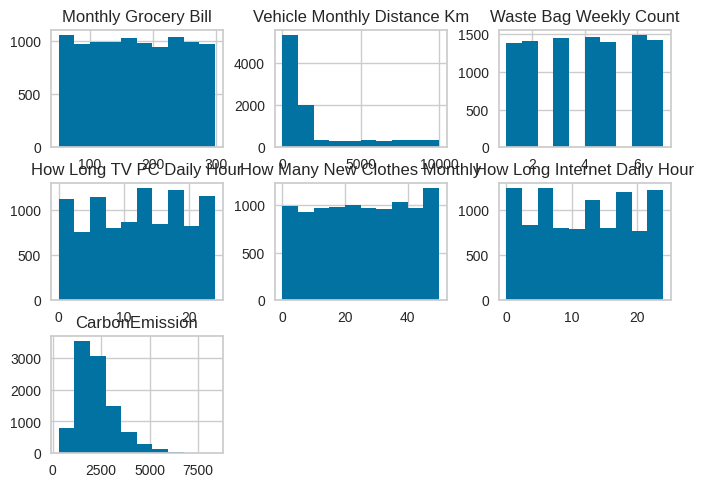

In [114]:
df_nums.hist()

<Axes: >

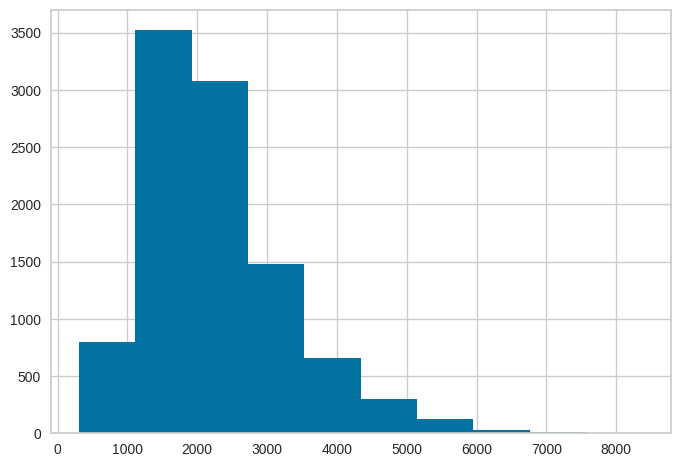

In [115]:
df_nums['CarbonEmission'].hist()

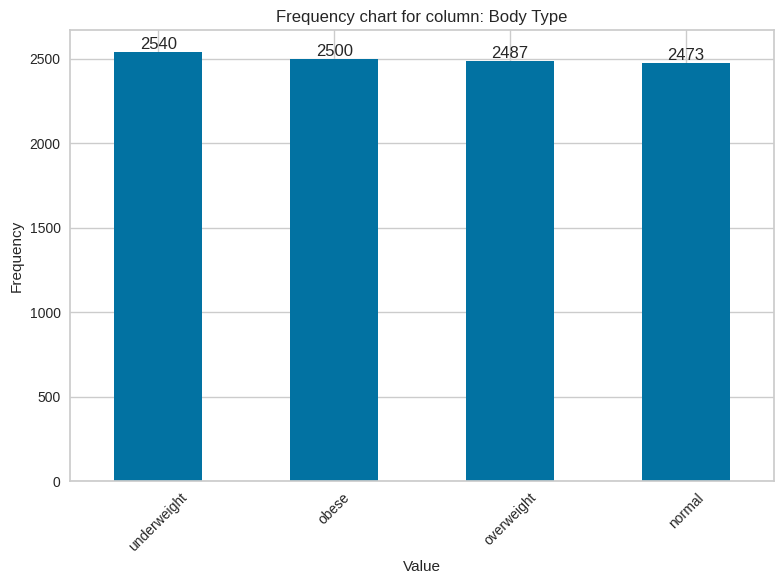

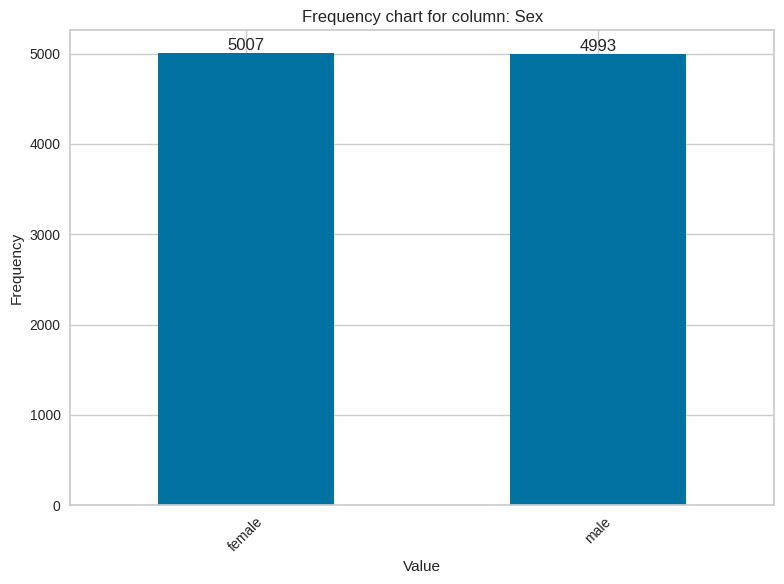

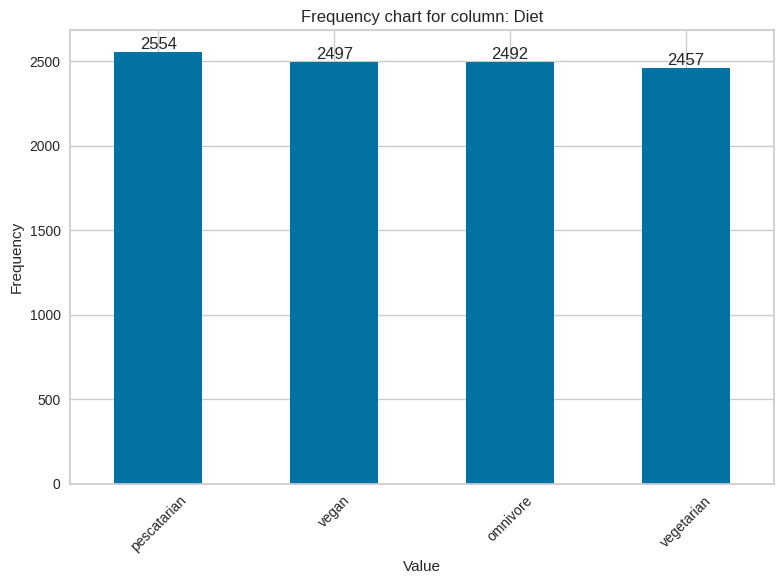

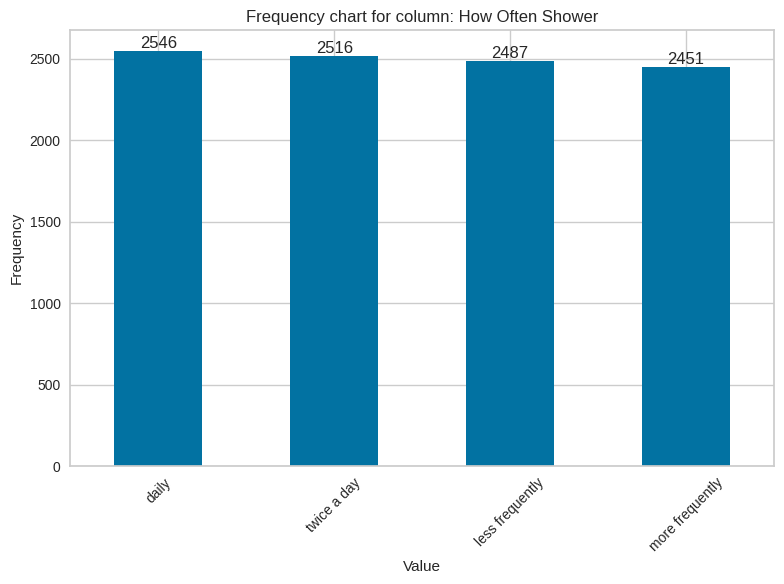

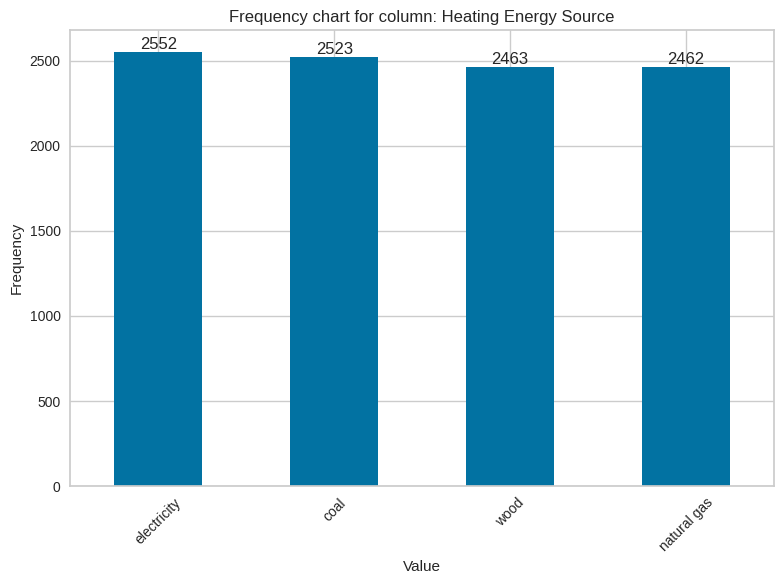

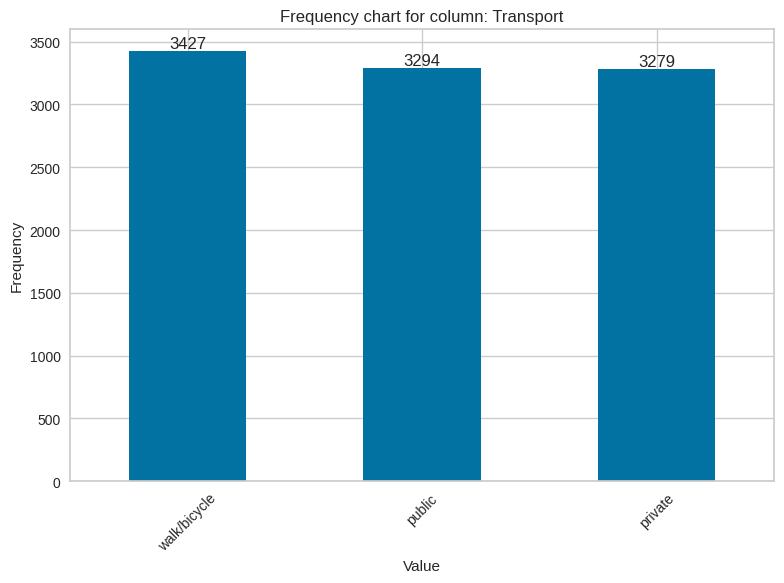

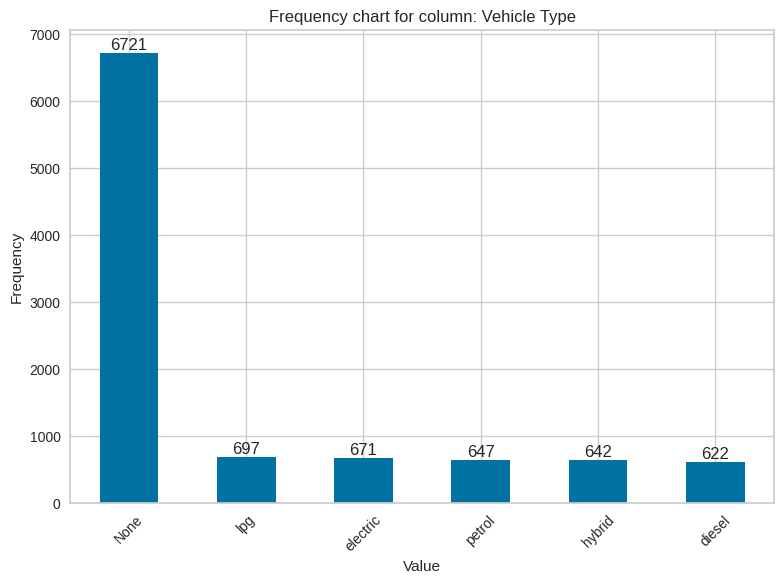

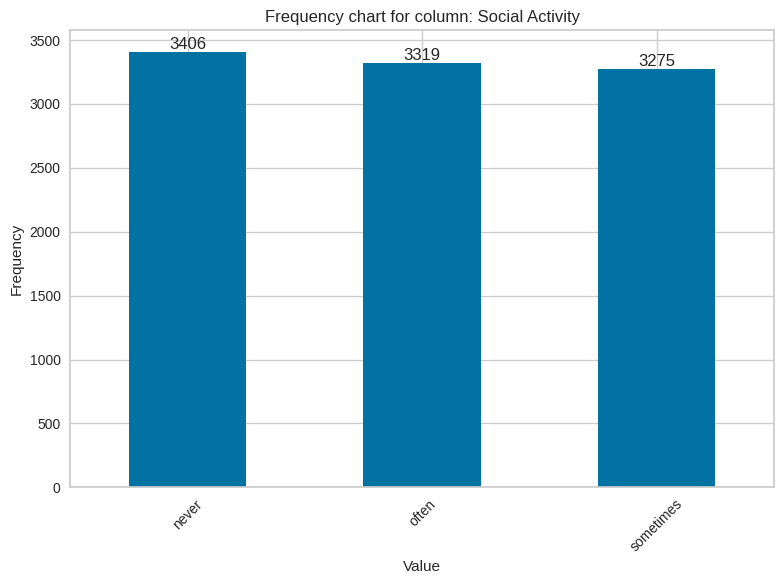

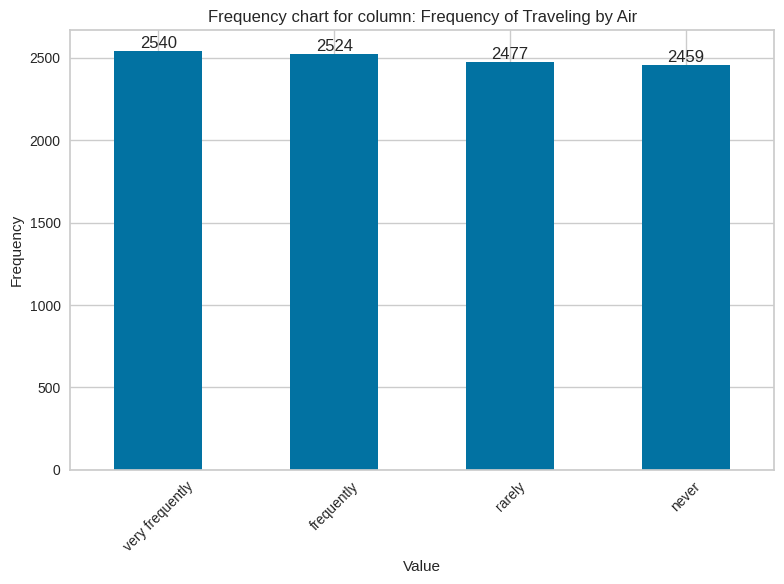

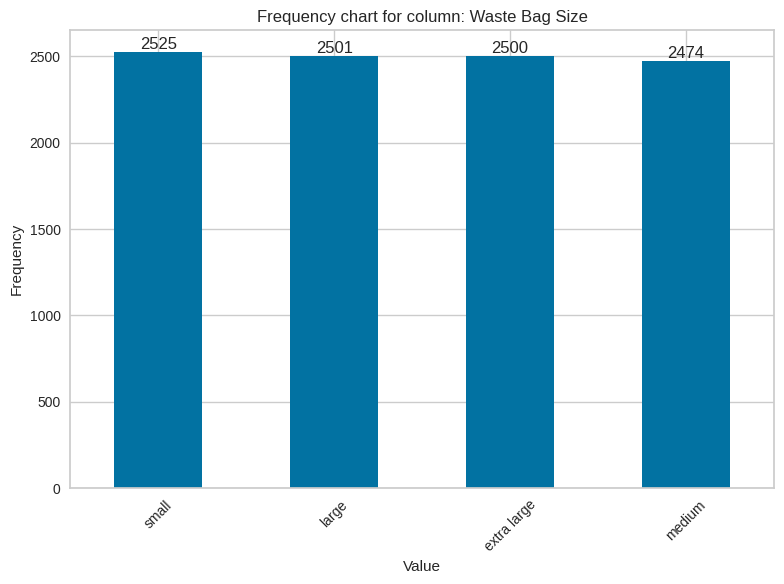

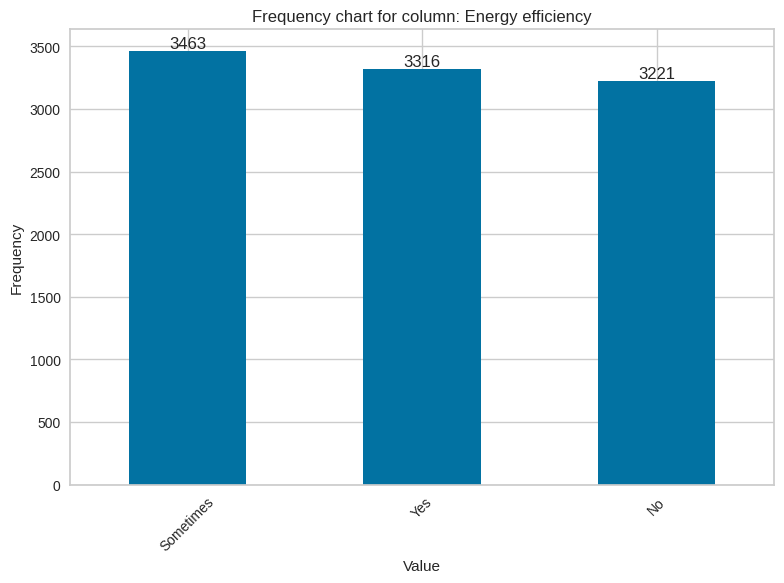

In [116]:
# Frequency chart for columns:
selected_columns = df.select_dtypes(include=['object']).columns[: -2]

frequency_count_list = {}

for col in selected_columns:
    counts = df[col].value_counts()
    frequency_count_list[col] = counts

for column, counts in frequency_count_list.items(): 
    plt.figure(figsize=(8, 6))
    counts.plot(kind='bar')
    plt.title(f"Frequency chart for column: {column}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)

    for i, v in enumerate(counts):
        plt.text(i, v, str(v), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

### Data cleaning and exploration

It looks like it follows a kind of skewed normal distribution, with a few outliers lying greatly above the mean

In [117]:
# Encode/transform data numeric
label_encoder = LabelEncoder()

# Making copy of df to a new dataframe called: df_numeric 
df_numeric = df

# Gettning all columns that has object type:
cate_columns = df.select_dtypes(include=['object']).columns

for column in cate_columns:
    df_numeric[column] = label_encoder.fit_transform(df[column])

In [118]:
# Verifying that cols have been encoded:
df_numeric.sample(5)

Body Type  Sex  Diet  How Often Shower  Heating Energy Source  \
5471          3    1     0                 3                      2   
1014          2    1     1                 3                      2   
5901          2    1     1                 0                      2   
8787          1    0     2                 3                      2   
1763          3    1     2                 0                      3   

      Transport  Vehicle Type  Social Activity  Monthly Grocery Bill  \
5471          2             0                0                   271   
1014          1             0                1                   148   
5901          2             0                0                   227   
8787          0             5                2                    55   
1763          0             1                0                   191   

      Frequency of Traveling by Air  Vehicle Monthly Distance Km  \
5471                              2                           80   
1014                              0                         1004   
5901                              0                           56   
8787                              2                         1083   
1763                              1                         3297   

      Waste Bag Size  Waste Bag Weekly Count  How Long TV PC Daily Hour  \
5471               0                       6                          4   
1014               2                       1                         13   
5901               1                       2                         15   
8787               0                       4                         20   
1763               2                       2                          3   

      How Many New Clothes Monthly  How Long Internet Daily Hour  \
5471                             3                             7   
1014                            45                            19   
5901                            41                            11   
8787                            19                            22   
1763                            15                            20   

      Energy efficiency  Recycling  Cooking_With  CarbonEmission  
5471                  0         10             0            1691  
1014                  2          1             7            2461  
5901                  2          1             4            2421  
8787                  2          3             6            1864  
1763                  0         14             0            1775

In [119]:
print(cate_columns)

Index(['Body Type', 'Sex', 'Diet', 'How Often Shower', 'Heating Energy Source',
       'Transport', 'Vehicle Type', 'Social Activity',
       'Frequency of Traveling by Air', 'Waste Bag Size', 'Energy efficiency',
       'Recycling', 'Cooking_With'],
      dtype='object')


In [120]:
# save Label encoding
with open('models/label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)


In [17]:
corr_matrix = df_numeric.corr()

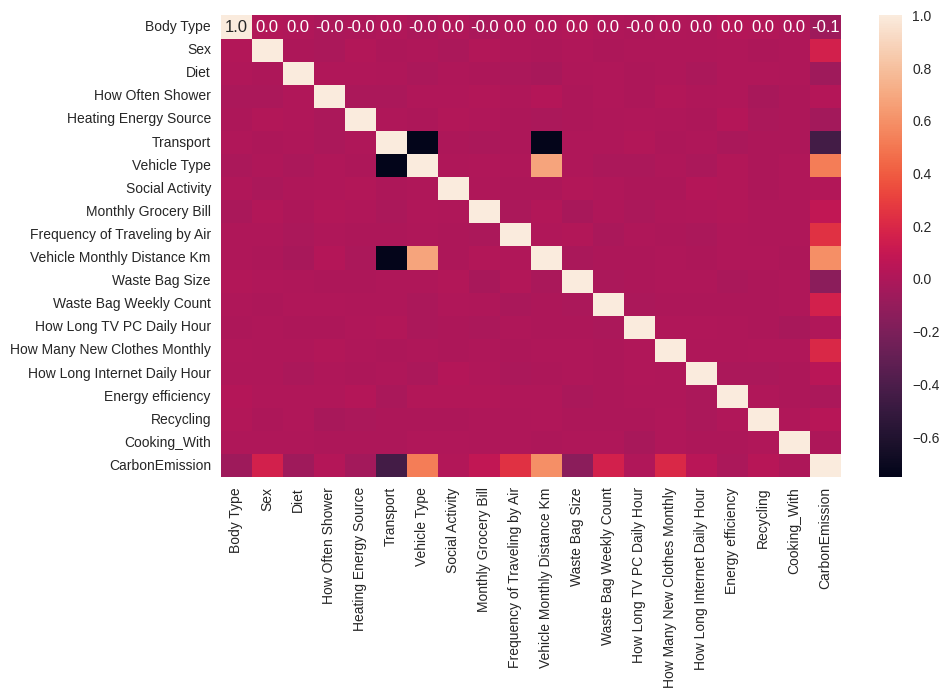

In [18]:
# Heatmap that can show correlation
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, fmt=".1f")
plt.show()

The biggest correlation with carbon emissions, seem to be the monthly travelled distance by personal vehicle. Other factor with clear correlations seem to be type of transport, vehicle type and frequency of travelling with airplane. There also seem to be a smaller correlation with the amount of clothes people buy.

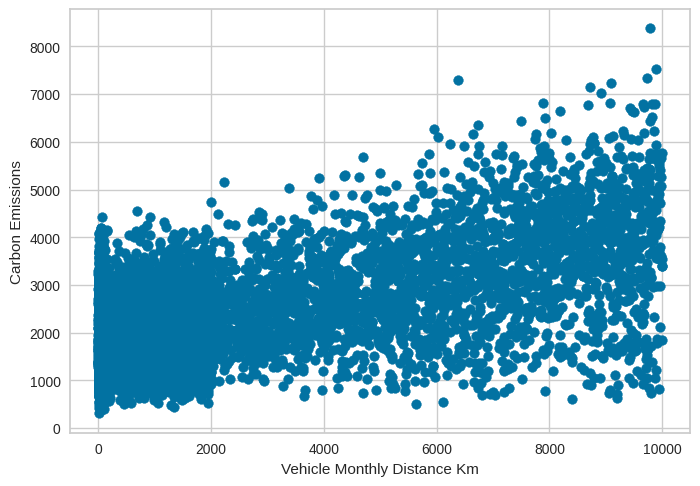

In [19]:
plt.xlabel('Vehicle Monthly Distance Km')
plt.ylabel('Carbon Emissions')
plt.scatter(df_numeric['Vehicle Monthly Distance Km'], df_numeric['CarbonEmission'])
plt.show()

Does internet usage have an impact on carbon emissions?

In [20]:
corr_matrix['CarbonEmission']['How Long Internet Daily Hour']

0.043878026391883734

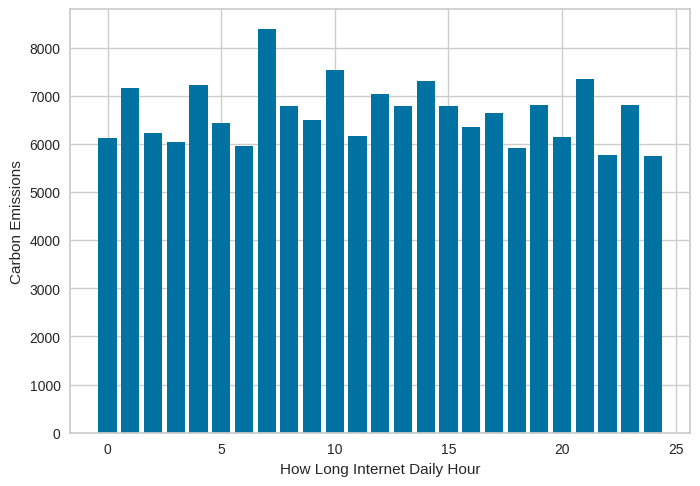

In [21]:
plt.xlabel('How Long Internet Daily Hour')
plt.ylabel('Carbon Emissions')
plt.bar(df_numeric['How Long Internet Daily Hour'], df_numeric['CarbonEmission'])
plt.show()

There is a slight correlation, but nowhere near enough to asser any tendencies. We are lucky computer people!

Let's see if theres as difference between male an female patterns

In [22]:
# Split dataframe based on sex, and see if theres a difference in the correlation
df_male = df_numeric[df_numeric['Sex'] == 1]
df_male

Body Type  Sex  Diet  How Often Shower  Heating Energy Source  \
2             2    1     0                 2                      3   
3             2    1     0                 3                      3   
5             2    1     3                 1                      3   
8             2    1     0                 0                      3   
11            1    1     3                 2                      0   
...         ...  ...   ...               ...                    ...   
9992          1    1     0                 2                      0   
9993          3    1     1                 2                      3   
9995          1    1     0                 3                      0   
9998          3    1     2                 2                      0   
9999          1    1     1                 3                      3   

      Transport  Vehicle Type  Social Activity  Monthly Grocery Bill  \
2             0             5                0                   138   
3             2             0                2                   157   
5             1             0                2                   144   
8             1             0                0                   200   
11            2             0                0                   111   
...         ...           ...              ...                   ...   
9992          1             0                0                   120   
9993          2             0                2                   118   
9995          0             3                2                   230   
9998          0             5                1                   179   
9999          0             2                2                   115   

      Frequency of Traveling by Air  Vehicle Monthly Distance Km  \
2                                 1                         2472   
3                                 2                           74   
5                                 0                          658   
8                                 0                         1376   
11                                3                           69   
...                             ...                          ...   
9992                              2                          421   
9993                              0                           78   
9995                              1                          268   
9998                              2                         8688   
9999                              1                         9952   

      Waste Bag Size  Waste Bag Weekly Count  How Long TV PC Daily Hour  \
2                  3                       1                         14   
3                  2                       3                         20   
5                  1                       1                         22   
8                  2                       3                          3   
11                 2                       5                          9   
...              ...                     ...                        ...   
9992               1                       3                         10   
9993               2                       3                          8   
9995               2                       5                         12   
9998               2                       5                         19   
9999               3                       4                         11   

      How Many New Clothes Monthly  How Long Internet Daily Hour  \
2                               47                             6   
3                                5                             7   
5                               18                             9   
8                               31                            15   
11                               4                             4   
...                            ...                           ...   
9992                            33                             6   
9993                      

In [23]:
df_female = df_numeric[df_numeric['Sex'] == 0]
df_female

Body Type  Sex  Diet  How Often Shower  Heating Energy Source  \
0             2    0     1                 0                      0   
1             1    0     3                 1                      2   
4             1    0     3                 0                      0   
6             3    0     2                 1                      3   
7             3    0     2                 2                      0   
...         ...  ...   ...               ...                    ...   
9990          3    0     0                 2                      1   
9991          1    0     0                 2                      0   
9994          0    0     3                 2                      3   
9996          0    0     2                 3                      0   
9997          2    0     3                 0                      1   

      Transport  Vehicle Type  Social Activity  Monthly Grocery Bill  \
0             1             0                1                   230   
1             2             0                1                   114   
4             0             1                1                   266   
6             0             3                0                    56   
7             2             0                2                    59   
...         ...           ...              ...                   ...   
9990          1             0                2                   226   
9991          2             0                0                    55   
9994          0             5                0                    89   
9996          0             4                0                   234   
9997          2             0                2                   298   

      Frequency of Traveling by Air  Vehicle Monthly Distance Km  \
0                                 0                          210   
1                                 2                            9   
4                                 3                         8457   
6                                 2                         5363   
7                                 3                           54   
...                             ...                          ...   
9990                              0                          755   
9991                              2                           82   
9994                              2                         4482   
9996                              0                         5316   
9997                              3                           96   

      Waste Bag Size  Waste Bag Weekly Count  How Long TV PC Daily Hour  \
0                  1                       4                          7   
1                  0                       3                          9   
4                  1                       1                          3   
6                  2                       4                          9   
7                  0                       3                          5   
...              ...                     ...                        ...   
9990               2                       7                         16   
9991               2                       2                         19   
9994               1                       5                         15   
9996               0                       3                         14   
9997               0                       5                         11   

      How Many New Clothes Monthly  How Long Internet Daily Hour  \
0                               26                             1   
1                               38                             5   
4                                5                             6   
6                               11                            19   
7                               39                            15   
...                            ...                           ...   
9990                            17                             4   
9991                      

In [24]:
df_male_corr = df_male.corr()
df_female_corr = df_female.corr()

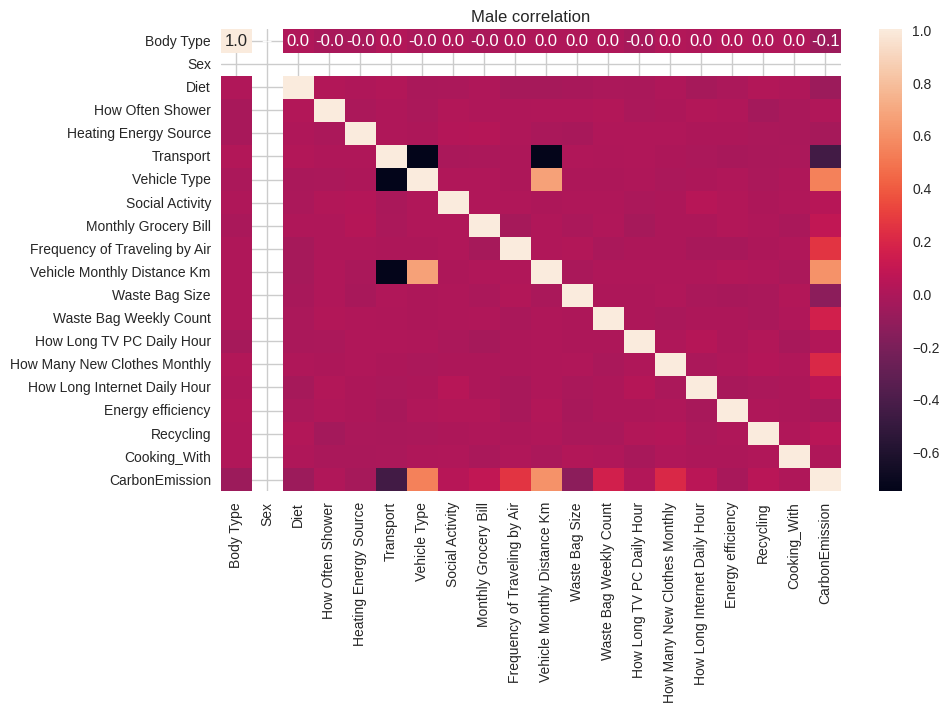

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(df_male_corr, annot=True, fmt=".1f")
plt.title('Male correlation')
plt.show()

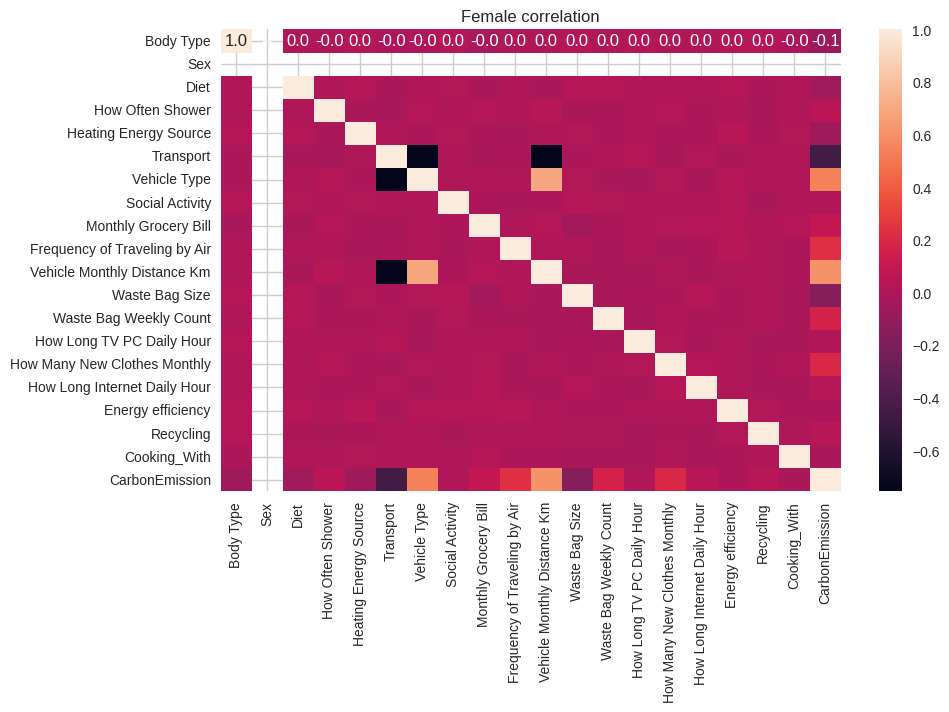

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(df_female_corr, annot=True, fmt=".1f")
plt.title('Female correlation')
plt.show()

There doesn't really seem to be a difference of how much the factors weigh between males and females

### Outliers

<Axes: >

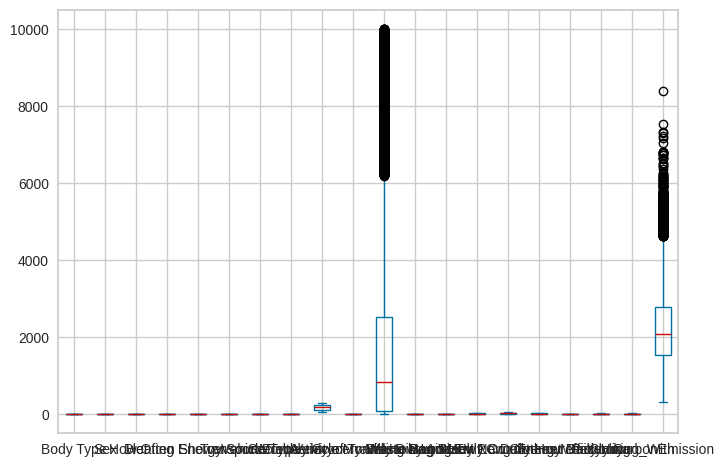

In [27]:
df_numeric.plot.box()

<Axes: >

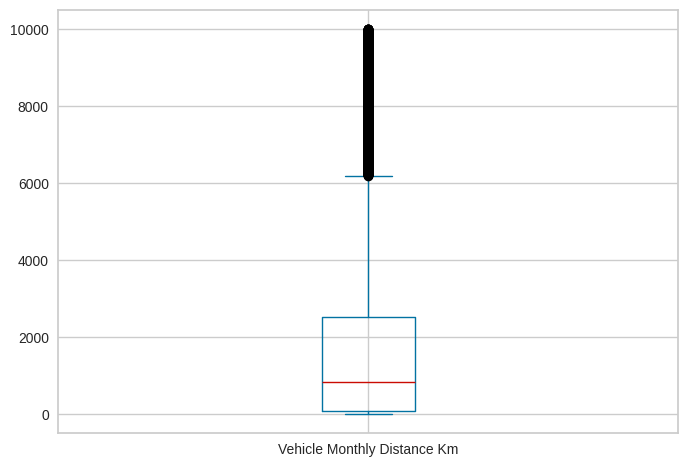

In [28]:
df_nums['Vehicle Monthly Distance Km'].plot.box()

In [29]:
med = df_nums['Vehicle Monthly Distance Km'].median()
df_nums['Vehicle Monthly Distance Km'].max() - med

9176.0

As we can see, the distribution of distance travelled by vehicle is very skewed, with 75% of the data lying beneath 3000 km pr month, with quite a few outlier being outragerously above the median. This might still be an accurate representation though, since some individuals just might travel that much. 
We'll keep it for the variance

Let's see if people are as accurate as they think, when they say they're energy efficient!

In [30]:
test = df_numeric.iloc[[6550]]
test

Body Type  Sex  Diet  How Often Shower  Heating Energy Source  \
6550          3    1     2                 3                      3   

      Transport  Vehicle Type  Social Activity  Monthly Grocery Bill  \
6550          2             0                2                   157   

      Frequency of Traveling by Air  Vehicle Monthly Distance Km  \
6550                              3                           13   

      Waste Bag Size  Waste Bag Weekly Count  How Long TV PC Daily Hour  \
6550               3                       2                         20   

      How Many New Clothes Monthly  How Long Internet Daily Hour  \
6550                            45                            12   

      Energy efficiency  Recycling  Cooking_With  CarbonEmission  
6550                  2          3             2            2372

In [31]:
grouped_data = df.groupby('Energy efficiency')

grouped = df.groupby('Energy efficiency')['CarbonEmission'].agg(['mean', 'sum']).reset_index()
grouped

Energy efficiency         mean      sum
0                  0  2286.656628  7365321
1                  1  2269.151314  7858071
2                  2  2252.135404  7468081

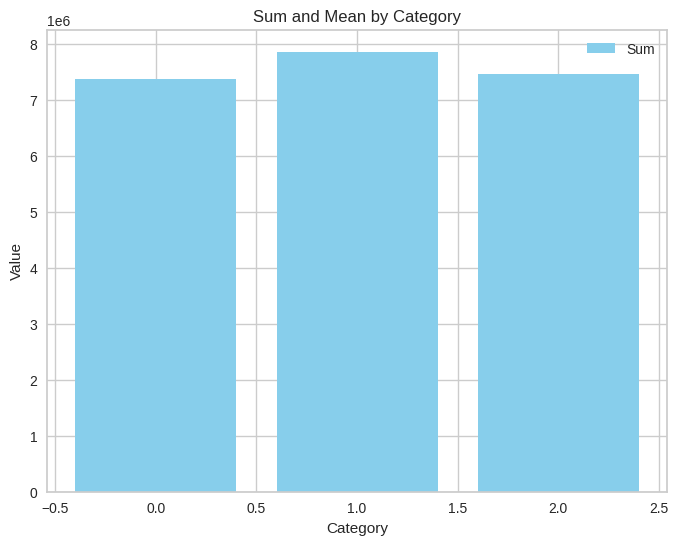

In [32]:
plt.figure(figsize=(8, 6))
plt.bar(grouped['Energy efficiency'], grouped['sum'], color='skyblue', label='Sum')
# plt.bar(grouped['Energy efficiency'], grouped['mean'], color='orange', label='Mean')
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Sum and Mean by Category')
plt.legend()
plt.show()

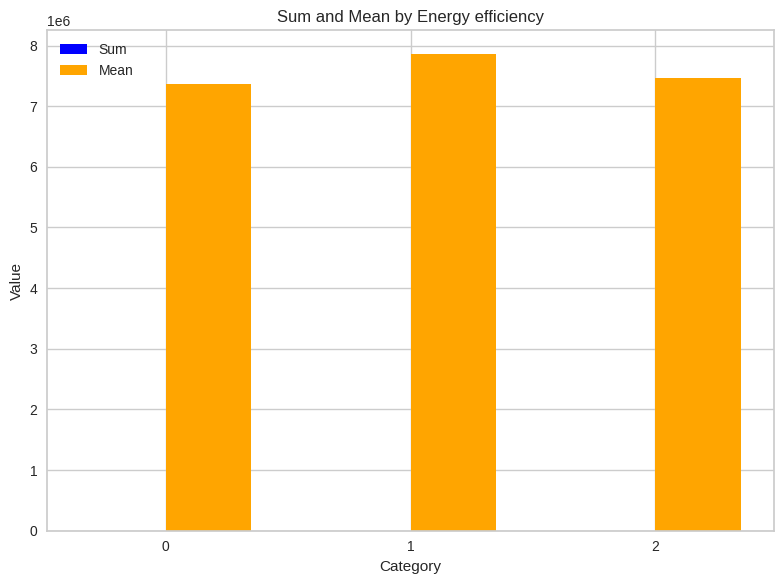

In [33]:
plt.figure(figsize=(8, 6))

# Define the width of each bar
bar_width = 0.35

# Define the positions for the bars
index = np.arange(len(grouped['Energy efficiency']))

# Create side-by-side bars for 'Sum' and 'Mean'
plt.bar(index, grouped['mean'], bar_width, color='blue', label='Sum')
plt.bar(index + bar_width, grouped['sum'], bar_width, color='orange', label='Mean')

# Add labels, title, and legend
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Sum and Mean by Energy efficiency')
plt.xticks(index + bar_width / 2, grouped['Energy efficiency'])
plt.legend()

plt.tight_layout()
plt.show()

<Axes: xlabel='Energy efficiency'>

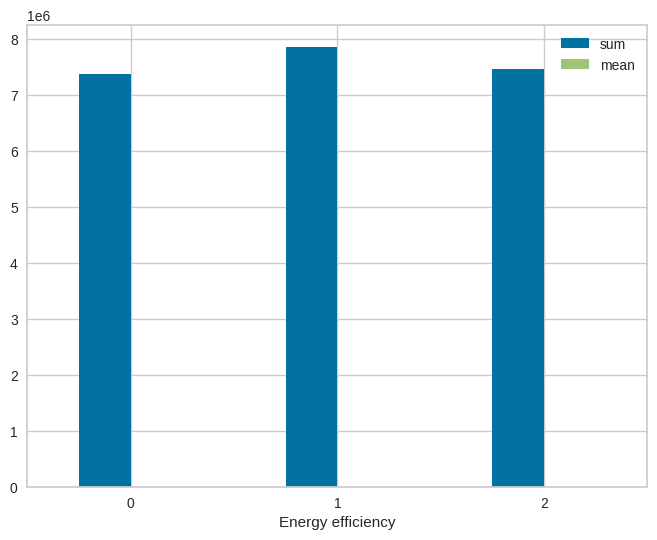

In [34]:
grouped['sum'] = grouped['sum'].astype(float)
grouped['mean'] = grouped['mean'].astype(float)
grouped.plot.bar(x='Energy efficiency', y=['sum','mean'], figsize=(8, 6), rot=0)

We can see that people say that the are energy efficient generally tend to have a little bit lower carbon emission in total, but the difference really is only about 1,5% lower than the 'No' category.

The total sum of carbon emissions seems to be higher by people declaring that they're being energy efficient, indicating that a lot more people think they are being efficient than not, while not really making any difference in the emitted carbon dioxide!

### Plane travel

We can see theres a small correlation between the Frequency of air travel, and their carbon emission, let's sxplore what it means

In [35]:
group_air = df.groupby('Frequency of Traveling by Air').size().reset_index(name='Count')
group_air

Frequency of Traveling by Air  Count
0                              0   2524
1                              1   2459
2                              2   2477
3                              3   2540

<Axes: ylabel='Count'>

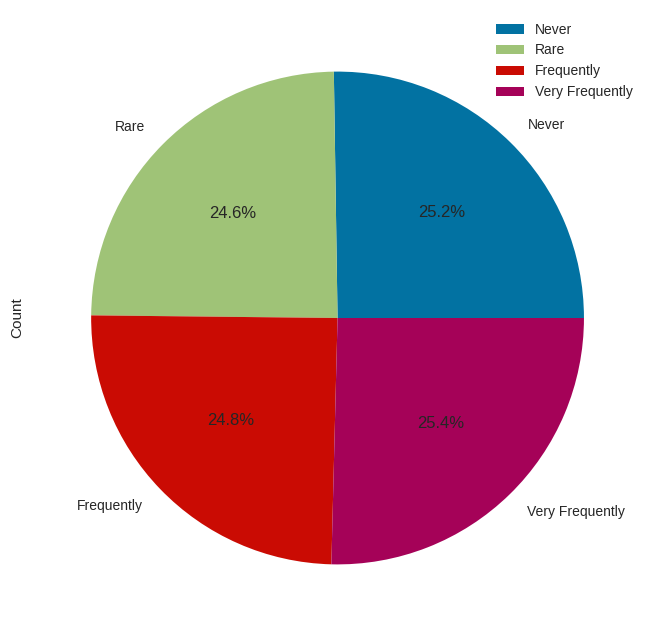

In [36]:
# Plot the distribution of the frequency
group_air.plot.pie(y='Count', labels=['Never', 'Rare', 'Frequently', 'Very Frequently'], autopct='%1.1f%%', figsize=(8, 8))

In [37]:
grouped = df.groupby('Frequency of Traveling by Air')['CarbonEmission'].agg(['mean', 'sum']).reset_index()
grouped

Frequency of Traveling by Air         mean      sum
0                              0  2362.866482  5963875
1                              1  1716.337129  4220473
2                              2  1945.872830  4819927
3                              3  3026.455906  7687198

<Axes: xlabel='Frequency of Traveling by Air'>

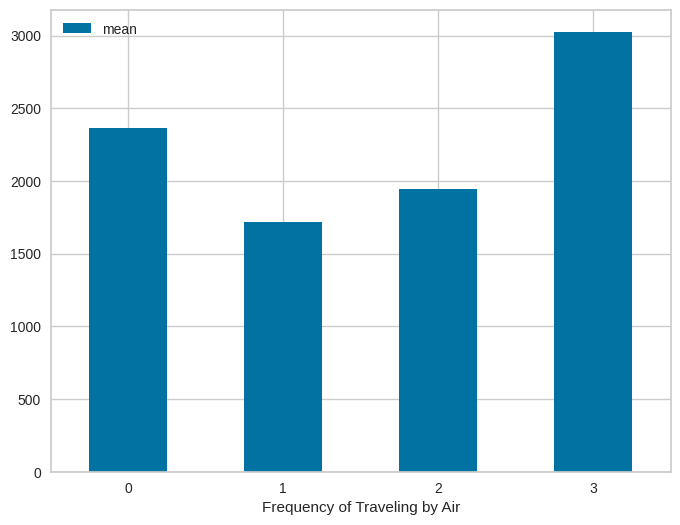

In [38]:
grouped.plot.bar(x='Frequency of Traveling by Air', y=['mean'], figsize=(8, 6), rot=0)

As we can see, the distribution of people is fairly equal between all different categories of flight frequency, but there's a clearly tendency of higher average carbon emissions from people who are in the 'very frequent' category.

The mean carbon emssions are around 22% higher for people who travel very frequently by air.


## Supervised Machine learning

Let's try and see if we can predict total carbon emission values by training different classifier models.
Since we're doing classification, we'll bin the carbon emission numbers into categories

In [39]:
df_numeric.sample(5)

Body Type  Sex  Diet  How Often Shower  Heating Energy Source  \
3348          0    1     3                 1                      0   
4370          2    1     2                 2                      1   
7839          3    0     0                 2                      0   
8965          3    1     0                 2                      0   
1818          2    1     2                 3                      3   

      Transport  Vehicle Type  Social Activity  Monthly Grocery Bill  \
3348          2             0                0                    54   
4370          1             0                1                   150   
7839          2             0                0                    50   
8965          1             0                0                    62   
1818          0             2                0                    93   

      Frequency of Traveling by Air  Vehicle Monthly Distance Km  \
3348                              1                           90   
4370                              2                          987   
7839                              1                           36   
8965                              2                          275   
1818                              0                         2071   

      Waste Bag Size  Waste Bag Weekly Count  How Long TV PC Daily Hour  \
3348               1                       2                          9   
4370               3                       3                          2   
7839               2                       7                          1   
8965               2                       4                          4   
1818               3                       3                          2   

      How Many New Clothes Monthly  How Long Internet Daily Hour  \
3348                             2                             1   
4370                             8                            21   
7839                            21                             2   
8965                             4                            10   
1818                            44                            10   

      Energy efficiency  Recycling  Cooking_With  CarbonEmission  
3348                  0         13             8             938  
4370                  2          9            13            1111  
7839                  1          7            15            1015  
8965                  0          2             8            1309  
1818                  0          9             6            2108

In [40]:
scaled_data = df_numeric[['CarbonEmission']]

In [41]:
qtrans = QuantileTransformer(output_distribution='normal', random_state=0)
scaled_data['CarbonEmission_trans_norm'] = qtrans.fit_transform(scaled_data[['CarbonEmission']])

print('Mean:', scaled_data['CarbonEmission_trans_norm'].mean())
print('Standard Deviation:', scaled_data['CarbonEmission_trans_norm'].std())

Mean: -5.7164614667183854e-05
Standard Deviation: 1.0008721999469523


In [42]:
scaled_data.describe()

CarbonEmission  CarbonEmission_trans_norm
count    10000.000000               10000.000000
mean      2269.147300                  -0.000057
std       1017.675247                   1.000872
min        306.000000                  -5.199338
25%       1538.000000                  -0.673702
50%       2080.000000                   0.000000
75%       2768.000000                   0.675027
max       8377.000000                   5.199338

In [43]:
df_part = df_numeric.copy().drop(columns=['CarbonEmission'], axis=1)
df_bin = pd.concat([df_part, scaled_data['CarbonEmission_trans_norm']], axis=1)
df_bin

Body Type  Sex  Diet  How Often Shower  Heating Energy Source  \
0             2    0     1                 0                      0   
1             1    0     3                 1                      2   
2             2    1     0                 2                      3   
3             2    1     0                 3                      3   
4             1    0     3                 0                      0   
...         ...  ...   ...               ...                    ...   
9995          1    1     0                 3                      0   
9996          0    0     2                 3                      0   
9997          2    0     3                 0                      1   
9998          3    1     2                 2                      0   
9999          1    1     1                 3                      3   

      Transport  Vehicle Type  Social Activity  Monthly Grocery Bill  \
0             1             0                1                   230   
1             2             0                1                   114   
2             0             5                0                   138   
3             2             0                2                   157   
4             0             1                1                   266   
...         ...           ...              ...                   ...   
9995          0             3                2                   230   
9996          0             4                0                   234   
9997          2             0                2                   298   
9998          0             5                1                   179   
9999          0             2                2                   115   

      Frequency of Traveling by Air  Vehicle Monthly Distance Km  \
0                                 0                          210   
1                                 2                            9   
2                                 1                         2472   
3                                 2                           74   
4                                 3                         8457   
...                             ...                          ...   
9995                              1                          268   
9996                              0                         5316   
9997                              3                           96   
9998                              2                         8688   
9999                              1                         9952   

      Waste Bag Size  Waste Bag Weekly Count  How Long TV PC Daily Hour  \
0                  1                       4                          7   
1                  0                       3                          9   
2                  3                       1                         14   
3                  2                       3                         20   
4                  1                       1                          3   
...              ...                     ...                        ...   
9995               2                       5                         12   
9996               0                       3                         14   
9997               0                       5                         11   
9998               2                       5                         19   
9999               3                       4                         11   

      How Many New Clothes Monthly  How Long Internet Daily Hour  \
0                               26                             1   
1                               38                             5   
2                               47                             6   
3                                5                             7   
4                                5                             6   
...                            ...                           ...   
9995                            27                             9   
9996                      

In [44]:
emission_max = df_bin['CarbonEmission_trans_norm'].max()
emission_min = df_bin['CarbonEmission_trans_norm'].min()

bins = np.linspace(emission_min -1, emission_max, 5)

df_bin['EmissionBin'] = pd.qcut(df_bin['CarbonEmission_trans_norm'], q=4, labels=False)
df_bin.describe()


Body Type           Sex          Diet  How Often Shower  \
count  10000.000000  10000.000000  10000.000000      10000.000000   
mean       1.509400      0.499300      1.491900          1.493700   
std        1.119213      0.500025      1.113489          1.123604   
min        0.000000      0.000000      0.000000          0.000000   
25%        1.000000      0.000000      1.000000          0.000000   
50%        2.000000      0.000000      1.000000          1.000000   
75%        3.000000      1.000000      2.000000          3.000000   
max        3.000000      1.000000      3.000000          3.000000   

       Heating Energy Source     Transport  Vehicle Type  Social Activity  \
count           10000.000000  10000.000000  10000.000000      10000.00000   
mean                1.486500      1.014800      0.991300          0.98690   
std                 1.116755      0.818809      1.630549          0.81731   
min                 0.000000      0.000000      0.000000          0.00000   
25%                 0.000000      0.000000      0.000000          0.00000   
50%                 1.000000      1.000000      0.000000          1.00000   
75%                 2.000000      2.000000      2.000000          2.00000   
max                 3.000000      2.000000      5.000000          2.00000   

       Monthly Grocery Bill  Frequency of Traveling by Air  ...  \
count          10000.000000                   10000.000000  ...   
mean             173.875200                       1.503300  ...   
std               72.234018                       1.123795  ...   
min               50.000000                       0.000000  ...   
25%              111.000000                       0.000000  ...   
50%              173.000000                       2.000000  ...   
75%              237.000000                       3.000000  ...   
max              299.000000                       3.000000  ...   

       Waste Bag Size  Waste Bag Weekly Count  How Long TV PC Daily Hour  \
count    10000.000000            10000.000000               10000.000000   
mean         1.502400                4.024600                  12.139200   
std          1.120321                1.990375                   7.106369   
min          0.000000                1.000000                   0.000000   
25%          0.750000                2.000000                   6.000000   
50%          1.000000                4.000000                  12.000000   
75%          3.000000                6.000000                  18.000000   
max          3.000000                7.000000                  24.000000   

       How Many New Clothes Monthly  How Long Internet Daily Hour  \
count                  10000.000000                  10000.000000   
mean                      25.109000                     11.889100   
std                       14.698725                      7.277218   
min                        0.000000                      0.000000   
25%                       13.000000                      6.000000   
50%                       25.000000                     12.000000   
75%                       38.000000                     18.000000   
max                       50.000000                     24.000000   

       Energy efficiency     Recycling  Cooking_With  \
count       10000.000000  10000.000000  10000.000000   
mean            1.009500      7.542100      7.514400   
std             0.808502      4.629295      4.583611   
min             0.000000      0.000000      0.000000   
25%             0.000000      3.000000      4.000000   
50%             1.000000      8.000000      8.000000   
75%             2.000000     12.000000     12.000000   
max             2.000000     15.000000     15.000000   

       CarbonEmission_trans_norm   EmissionBin  
count               10000.000000  10000.000000  
mean                   -0.000057      1.498500  
std                     1.000872      1.118178  
min                    -5.199338      0.000000  
25%                    -0.673702 

In [45]:
grouped_bin = df_bin.groupby('EmissionBin').size().reset_index(name='Count')
grouped_bin

EmissionBin  Count
0            0   2506
1            1   2498
2            2   2501
3            3   2495

In [46]:
df_bin.drop('CarbonEmission_trans_norm', axis=1, inplace=True)
df_bin.sample(5)

Body Type  Sex  Diet  How Often Shower  Heating Energy Source  \
8743          3    0     0                 0                      0   
6270          3    1     1                 0                      3   
450           2    0     3                 3                      3   
4410          2    1     0                 2                      1   
7470          3    1     2                 2                      0   

      Transport  Vehicle Type  Social Activity  Monthly Grocery Bill  \
8743          2             0                0                   162   
6270          2             0                1                   250   
450           1             0                2                   108   
4410          0             5                0                   240   
7470          2             0                0                   235   

      Frequency of Traveling by Air  Vehicle Monthly Distance Km  \
8743                              0                           54   
6270                              1                           66   
450                               2                          575   
4410                              2                         9925   
7470                              0                           99   

      Waste Bag Size  Waste Bag Weekly Count  How Long TV PC Daily Hour  \
8743               2                       5                          8   
6270               2                       5                          7   
450                1                       6                         15   
4410               0                       1                         14   
7470               3                       2                         16   

      How Many New Clothes Monthly  How Long Internet Daily Hour  \
8743                            44                            21   
6270                            16                            11   
450                             45                            20   
4410                             5                            13   
7470                            25                             4   

      Energy efficiency  Recycling  Cooking_With  EmissionBin  
8743                  1         15            14            2  
6270                  1         12             8            0  
450                   1         10            14            1  
4410                  1         14            14            3  
7470                  0          4             1            1

### Model training

In [47]:
# Selecting the features (x) and the target (y)
ml_x = df_numeric.drop('CarbonEmission', axis=1).values
ml_y = df_numeric['CarbonEmission'].values

In [48]:
X_train, X_test, y_train, y_test = train_test_split(ml_x, ml_y, test_size=0.2, random_state=1)

In [49]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
# Initialize the model(s)
xgbr = XGBRegressor()
linearreg = LinearRegression()
svr = SVR()

In [51]:
# Fit the model(s)
xgbr.fit(X_train, y_train)
linearreg.fit(X_train, y_train)
svr.fit(X_train, y_train)

SVR()

In [52]:
# Predict the target
y_pred_xgbr = xgbr.predict(X_test)
y_pred_linearreg = linearreg.predict(X_test)
y_pred_svr = svr.predict(X_test)

In [53]:
ml_res = {
    "ML models": ["XGBRegressor", "LinearRegression", "SVR"],
    "r2": [
        r2_score(y_test, y_pred_xgbr),
        r2_score(y_test, y_pred_linearreg),
        r2_score(y_test, y_pred_svr)
    ],
    "MAE": [
        mean_absolute_error(y_test, y_pred_xgbr),
        mean_absolute_error(y_test, y_pred_linearreg),
        mean_absolute_error(y_test, y_pred_svr)
    ]
}
# Create a dataframe
ml_res_df = pd.DataFrame(ml_res)
ml_res_df

ML models        r2         MAE
0      XGBRegressor  0.975728  120.023525
1  LinearRegression  0.605501  524.908445
2               SVR  0.105251  725.583154

The XGBoost model looks to have the best accuracy, with a score of 0.9747 on the test set, with only a MAE of 123.98. This is more then likely beacuse of the model ability to be regularization, both L1 and L2 to handle overfitting. Not only that, but  also how its build on top of gradient boosting framework, tree pruning, handling missing values, cross-validation and parallel processing.

In [54]:
# Storing xgboost model
pickle.dump(xgbr, open('./models/xgboost_model.pkl', 'wb'))

#### Naive Bayes model

In [55]:
df_bin.head()

Body Type  Sex  Diet  How Often Shower  Heating Energy Source  Transport  \
0          2    0     1                 0                      0          1   
1          1    0     3                 1                      2          2   
2          2    1     0                 2                      3          0   
3          2    1     0                 3                      3          2   
4          1    0     3                 0                      0          0   

   Vehicle Type  Social Activity  Monthly Grocery Bill  \
0             0                1                   230   
1             0                1                   114   
2             5                0                   138   
3             0                2                   157   
4             1                1                   266   

   Frequency of Traveling by Air  Vehicle Monthly Distance Km  Waste Bag Size  \
0                              0                          210               1   
1                              2                            9               0   
2                              1                         2472               3   
3                              2                           74               2   
4                              3                         8457               1   

   Waste Bag Weekly Count  How Long TV PC Daily Hour  \
0                       4                          7   
1                       3                          9   
2                       1                         14   
3                       3                         20   
4                       1                          3   

   How Many New Clothes Monthly  How Long Internet Daily Hour  \
0                            26                             1   
1                            38                             5   
2                            47                             6   
3                             5                             7   
4                             5                             6   

   Energy efficiency  Recycling  Cooking_With  EmissionBin  
0                  0          2            13            2  
1                  0          2             9            1  
2                  1          2             5            2  
3                  1          6             1            0  
4                  2         10             6            3

In [56]:
# Convert the dataset into array
array = df_bin.values
# Create two axis for the test data
X = array[:,0:19] 
Y = array[:,-1]   # CarbonEmission
Y

array([2, 1, 2, ..., 2, 3, 0])

In [57]:
# split proportion
test_set_size = 0.15

# Initial value for randomization
seed = 42 # this is the answer
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_set_size, random_state=seed)

In [58]:
# Use GaussianNB for numeric data
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [59]:
# test the model
nb.score(X_test, Y_test)

0.54

An accuracy of about 70 percent, not bad for a first try, but I think we can do better.
Let's try to focus on the correlating values

In [60]:
column_indexes = ['Body Type', 'Diet', 'How Often Shower', 'Heating Energy Source',
       'Transport', 'Social Activity', 'Monthly Grocery Bill',
       'Frequency of Traveling by Air', 'Vehicle Monthly Distance Km',
       'Waste Bag Size', 'Waste Bag Weekly Count',
       'How Many New Clothes Monthly'] # Columns with correlation > 0.1
df_features = df_numeric[column_indexes]
df_features.columns

Index(['Body Type', 'Diet', 'How Often Shower', 'Heating Energy Source',
       'Transport', 'Social Activity', 'Monthly Grocery Bill',
       'Frequency of Traveling by Air', 'Vehicle Monthly Distance Km',
       'Waste Bag Size', 'Waste Bag Weekly Count',
       'How Many New Clothes Monthly'],
      dtype='object')

In [61]:
X = df_numeric[column_indexes].values
X


array([[ 2,  1,  0, ...,  1,  4, 26],
       [ 1,  3,  1, ...,  0,  3, 38],
       [ 2,  0,  2, ...,  3,  1, 47],
       ...,
       [ 2,  3,  0, ...,  0,  5,  5],
       [ 3,  2,  2, ...,  2,  5, 14],
       [ 1,  1,  3, ...,  3,  4,  6]])

In [62]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_set_size, random_state=seed)
Y_test.shape

(1500,)

In [63]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

#### Validation

In [64]:
prediction = nb.predict(X_test)
prediction

array([0, 1, 1, ..., 2, 2, 3])

In [65]:
print(accuracy_score(Y_test, prediction))

0.5666666666666667


In [66]:
cmat = confusion_matrix(Y_test, prediction)
print(cmat)
print(classification_report(Y_test, prediction))

[[279  47   5  25]
 [117 180  57  41]
 [  5 127 153  82]
 [  0  21 123 238]]
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       356
           1       0.48      0.46      0.47       395
           2       0.45      0.42      0.43       367
           3       0.62      0.62      0.62       382

    accuracy                           0.57      1500
   macro avg       0.56      0.57      0.56      1500
weighted avg       0.56      0.57      0.56      1500



In the end, it made a bigger difference to adjust the test set size to around 15% of the set

### Decision Tree Classifier

In [67]:
test_set_size = 0.15
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_set_size, random_state=seed)
Y_test.shape

(1500,)

In [68]:
# Build Decision Trees Classifier 
params = {'max_depth': 6}
treeM = DecisionTreeClassifier(**params)
treeM.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=6)

In [69]:
gr_data = tree.export_graphviz(treeM, out_file=None, 
                         feature_names=df_features.columns, class_names = True,        
                         filled=True, rounded=True, proportion = False, special_characters=True)  
dtree = graphviz.Source(gr_data)

In [70]:
# render the tree as pdf
dtree.render('dtree_render', format='pdf', cleanup=True)

'dtree_render.pdf'

#### Validation

In [71]:
y_predict = treeM.predict(X_test)
y_predict

array([0, 1, 2, ..., 3, 3, 3])

In [72]:
cmat = confusion_matrix(Y_test, y_predict)
print(cmat)
print(classification_report(Y_test, y_predict))

[[243  88   7  18]
 [107 179  85  24]
 [  9  86 201  71]
 [  2  10 106 264]]
              precision    recall  f1-score   support

           0       0.67      0.68      0.68       356
           1       0.49      0.45      0.47       395
           2       0.50      0.55      0.52       367
           3       0.70      0.69      0.70       382

    accuracy                           0.59      1500
   macro avg       0.59      0.59      0.59      1500
weighted avg       0.59      0.59      0.59      1500



Even better than before. Maybe our predictions can be even more accurate by using several decision trees

### Random Forest Classifier

In [73]:
test_set_size = 0.15
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_set_size, random_state=seed)
Y_test.shape

(1500,)

In [74]:
forest = RandomForestClassifier(n_estimators = 300, max_depth = 13)
forest.fit(X_train, Y_train)

RandomForestClassifier(max_depth=13, n_estimators=300)

#### Validation

In [75]:
y_predict = forest.predict(X_test)
y_predict

array([0, 1, 1, ..., 2, 3, 3])

In [76]:
cmat = confusion_matrix(Y_test, y_predict)
print(cmat)
print(classification_report(Y_test, y_predict))

[[287  46   6  17]
 [ 90 214  65  26]
 [  4  73 207  83]
 [  1   3  75 303]]
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       356
           1       0.64      0.54      0.59       395
           2       0.59      0.56      0.58       367
           3       0.71      0.79      0.75       382

    accuracy                           0.67      1500
   macro avg       0.67      0.68      0.67      1500
weighted avg       0.67      0.67      0.67      1500



In [77]:
pickle.dump(forest, open('./models/forest_model.pkl', 'wb'))

### Classification summary

**Iteration 1**
- No data normalization
- 5 equally divided bins <br />

80% accuracy (RFC)

At 80% accuracy the random forest classifier seems to be the most accurate model we have tested. It seems to correctly categorize a lot of the lower emitting categories, and is a little less accurate on cases with fewer instances. It's still making some big mistakes which might not show up in the overall calculated score, but is very significant.
For example, none of the models have succesfully caught any people in the topmost carbon emitting category. Perhaps implying, that the category data sould be binned differently, becuase if only very few instances fit into the bin, the model might not have any chance of recieving enough training data to be able to recognize the extreme cases.

**Iteration 2**
- Data transformed to normal distribution
- 4 equally divided bins

87% accuracy (RFC).

Model accuracy have improved in accuracy. I accredit this to the fewer bins and the now normal distribution of the data. Even though the accuracy seems higher, the result is still unsatisfactory since it fails to identify any extreme cases in both high and low end. Because of the normal distribution transform, the data have accumulated around the mean, resulting in only around 2% of the data fitting in the extreme bins. The training data might still be to sparse to let the model identify these few extreme cases

**Iteration 3**
- Data transformed to normal distribution
- 3 equally divided bins

92% accuracy (RFC)

Model have once model improved in accuracy. Even with only 3 bins, the middle bin is responsible for 92% of the data. The fewer amount of bins, gives better results when identifying outlier cases, but it is still very overfitted and not very useful

**Iteration 4**
- Data transformed to normal distribution
- 4 bins divided by quantiles

67% accuracy (RFC)

Accuracy has dropped to 67%, but seems to catch a lot more of the extreme cases, now the bin sizes have been adjusted. It now represents the data tendencies way better, and are less overfitted.



### Neural Network

In [90]:
ml_x = df_numeric.drop('CarbonEmission', axis=1).columns
ml_x

Index(['Body Type', 'Sex', 'Diet', 'How Often Shower', 'Heating Energy Source',
       'Transport', 'Vehicle Type', 'Social Activity', 'Monthly Grocery Bill',
       'Frequency of Traveling by Air', 'Vehicle Monthly Distance Km',
       'Waste Bag Size', 'Waste Bag Weekly Count', 'How Long TV PC Daily Hour',
       'How Many New Clothes Monthly', 'How Long Internet Daily Hour',
       'Energy efficiency', 'Recycling', 'Cooking_With'],
      dtype='object')

In [78]:
ml_x = df_numeric.drop('CarbonEmission', axis=1).values
ml_y = df_numeric['CarbonEmission'].values

scaler = StandardScaler()
y = ml_y
x = scaler.fit_transform(ml_x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [79]:
# Create model for neural network:
# Selecting input shape, and defining number of layers & neurons
model = keras.Sequential([
    keras.layers.Input(shape=(19,)),             # 19 feature / input neurons
    
    keras.layers.Dense(256, activation='relu'),  # Hidden layer with 32 neurons and ReLU activation
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(512, activation='relu'),

    keras.layers.Dense(1)                        # Output layers
])

In [80]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               5120      
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 1)                 513       
                                                                 
Total params: 662529 (2.53 MB)
Trainable params: 662529 (2.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [81]:
# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

In [82]:
# Train the model
model.fit(X_train, y_train, epochs=50)

Epoch 1/50


250/250 [==============================] - 4s 12ms/step - loss: 629.6725
Epoch 2/50
250/250 [==============================] - 3s 12ms/step - loss: 342.3182
Epoch 3/50
250/250 [==============================] - 3s 11ms/step - loss: 292.9897
Epoch 4/50
250/250 [==============================] - 3s 12ms/step - loss: 260.6869
Epoch 5/50
250/250 [==============================] - 3s 11ms/step - loss: 237.0322
Epoch 6/50
250/250 [==============================] - 3s 11ms/step - loss: 223.2353
Epoch 7/50
250/250 [==============================] - 3s 11ms/step - loss: 207.9155
Epoch 8/50
250/250 [==============================] - 3s 11ms/step - loss: 199.9840
Epoch 9/50
250/250 [==============================] - 3s 11ms/step - loss: 181.7663
Epoch 10/50
250/250 [==============================] - 3s 11ms/step - loss: 151.9738
Epoch 11/50
250/250 [==============================] - 3s 11ms/step - loss: 136.1084
Epoch 12/50
250/250 [==============================] - 3s 11ms/step - loss: 126.8503


In [86]:
t_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {t_loss:.2f}")

 1/63 [..............................] - ETA: 1s - loss: 91.2614

63/63 [==============================] - 0s 4ms/step - loss: 116.4074
Test Loss: 116.41


In [87]:
pred = model.predict(X_test)
print(r2_score(y_test, pred))

 1/63 [..............................] - ETA: 1s

63/63 [==============================] - 0s 6ms/step
0.9790781867703726


In [94]:
pred

array([[1382.2666],
       [2197.825 ],
       [1384.4089],
       ...,
       [2289.7903],
       [2131.247 ],
       [2263.5222]], dtype=float32)

In [88]:
pickle.dump(model, open('./models/nn_model.pkl', 'wb')) # last saved 0.9819 accuracy

### Neural Network Results

 [x1,... xn] means the numbers of neurons for each layer in the network

<table><tr>
<td>

|Layers                      | Epochs | Accuracy | Test Loss | MAE     |
|----------------------------| -------| -------- | ----------| --------|
|1 lay [32]                  | 50     | 0.6514   | 485.4101  | 488.3452|
|1 lay [64]                  | 50     | 0.6794   | 458.6350  | 457.2778|
|1 lay [128]                 | 50     | 0.7634   | 360.0965  | 358.2312|
|1 lay [256]                 | 50     | 0.8073   | 314.0002  | 303.8010|
|1 lay [512]                 | 50     | 0.8387   | 277.7811  | 267.3893|


</td><td>

|Layers                      | Epochs | Accuracy | Test Loss | MAE     |
|----------------------------| -------| -------- | ----------| --------|
|2 lay [32, 64]              | 50     | 0.8260   | 305.7189  | 287.4525|
|2 lay [64, 128]             | 50     | 0.8519   | 280.6377  | 259.1389|
|2 lay [128, 256]            | 50     | 0.9222   | 195.7561  | 177.1057|
|2 lay [256, 512]            | 50     | 0.9588   | 154.8777  | 133.3263|

</td></tr>

<tr>
<td>

|Layers                      | Epochs | Accuracy | Test Loss | MAE     |
|----------------------------| -------| -------- | ----------| --------|
|3 lay [32, 64, 128]         | 50     | 0.8919   | 219.7377  | 210.3670|
|3 lay [64, 128, 256]        | 50     | 0.9469   | 167.5058  | 152.9221|
|3 lay [128, 256, 512]       | 50     | 0.9755   | 126.4031  | 104.1510|
|3 lay [256, 512, 512]       | 50     | 0.9800   | 115.4065  | 81.7558 |

</td><td>

|Layers                      | Epochs | Accuracy | Test Loss | MAE     |
|----------------------------| -------| -------- | ----------| --------|
|4 lay [32, 64, 128, 256]    | 50     | 0.9787   | 117.9240  | 108.2563|
|4 lay [64, 128, 256, 512]   | 50     | 0.9792   | 117.7210  | 94.6650 |
|4 lay [128, 256, 512, 512]  | 50     | 0.9713   | 134.8475  | 80.8660 |
|4 lay [256, 512, 512, 512]  | 50     | 0.9819   | 109.2275  | 75.5905 |

</td></tr></table>

<!-- |19 lay [all 32] | 50     | 0.974    | 126.68 | v| -->

NB: Source used for helping to make this neural network: [Neural Network Regression Implementation and Visualization in Python](https://medium.com/@nandiniverma78988/neural-network-regression-implementation-and-visualization-in-python-d5893713ed79)

#### Approach (simple model)

The approach was to start with a simple model, and then add complexity over time to try to increase the accuracy of the model. At the beginning, we chose to start with only one hidden layer and 32 neurons, and then each time increase neurons with the power of 2. We made the assumption that the max number of neurons in a layer should be 512 to avoid overfitting, beacuse we know that more neurons means that the model has a higher capacity to learn form the traning data; however we dont want the model to learn from noise and other irrelevant factors, which can lead to overfitting.

#### Configuration

The 4 performance metrics of the neural network with varying configurations over 50 epochs of layers and neurons are shown in the table above. This config are defined by the number of layers and the number of neurons in each layer. For all iterations, we chose the activations function: ReLU:
```math
f(x) = max(0, x)
```

#### Results

The results show that the accuracy of the model increases with the number of layers and neurons. We can see that the accuracy of the model is 0.9819 with 4 layers (256, 512, 512, 512 neurons) The test loss is 109.2275 and the mean absolute error is 75.5905. This is the best result we have achieved with the neural network.
We can also conclude that the neural network has better results the our XGBoost model, that 'only' got an accuracy of 0.9747 and a MAE of 123.9864.


#### Alterantive improvements

Without a doubt, we know that our neural network has a good accuracy 0.9819 and a littel MAE on 75.5905. However, we can still alot of different was to try and improve the model.
The different tings that can be experimaneted with are the following:
- The number of epochs
- The number of layers
- The number of neurons in each layer
- The activation function

## Unsupervised machine learning

### Applying the data to K-means, Hierarchical clustering, DBSCAN & Mean Shift

The perpose of applying these clustering models, is to see if, there are patterns in the data, that we haven't been able to see ny the numbers only.

In [213]:
scaler = StandardScaler()

In [214]:
# Create an instance of PCA
pca = PCA(n_components=2)

X_scaled = scaler.fit_transform(df_numeric)

# Fit the PCA model to the data
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame with the PCA results
df_numeric_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_numeric_pca


PC1       PC2
0    -0.765903 -1.105746
1    -1.505419  0.131076
2     2.061724 -1.193276
3    -1.827675  0.251087
4     2.881131 -0.345230
...        ...       ...
9995  1.141488  0.435181
9996  2.478402 -0.740882
9997 -1.168829  1.474697
9998  4.158036 -0.077733
9999  1.702232 -2.007108

[10000 rows x 2 columns]

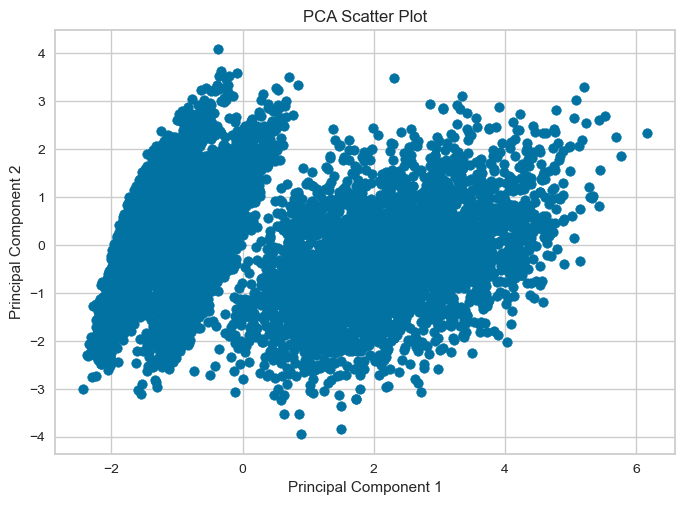

In [215]:
# Create a scatter plot of the first two principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.show()


In [216]:
X = df_numeric_pca.values
X

array([[-0.7659026 , -1.10574605],
       [-1.50541863,  0.13107567],
       [ 2.06172404, -1.19327627],
       ...,
       [-1.16882945,  1.47469708],
       [ 4.15803616, -0.07773337],
       [ 1.7022317 , -2.00710804]])

### Hierarchical clustering

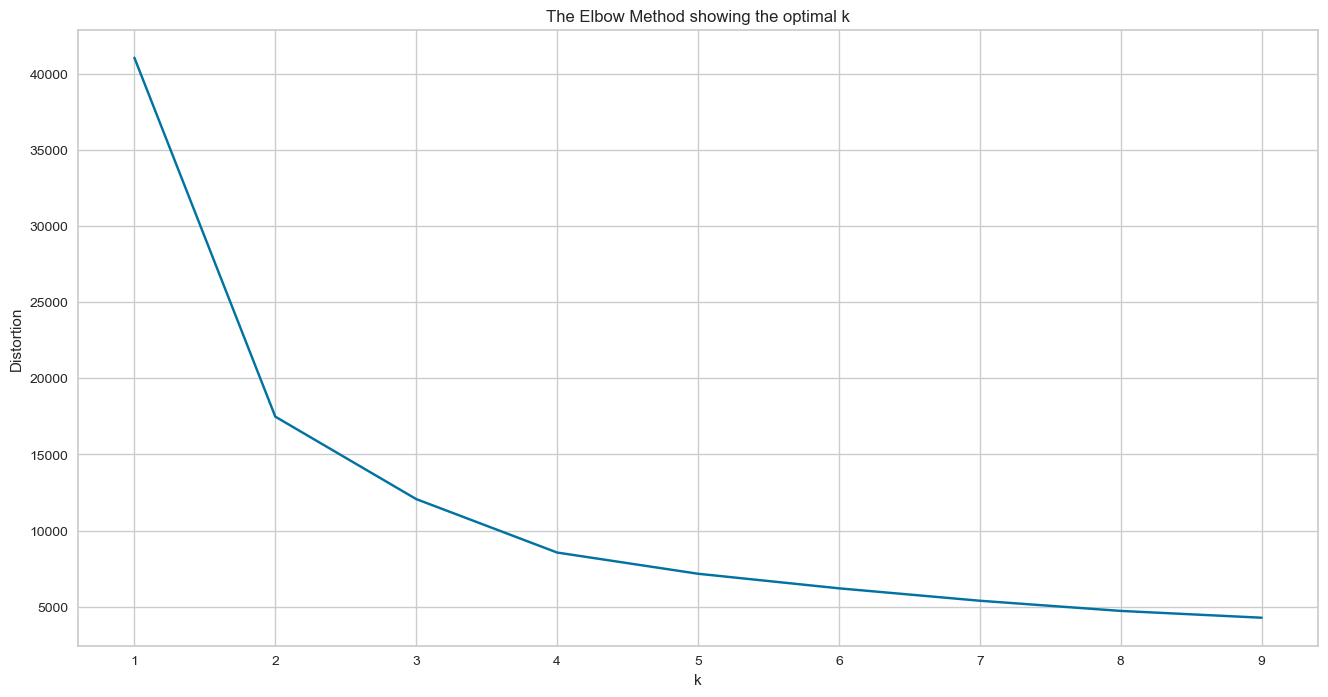

In [217]:
# Using the elbow method to find the optimal number of clusters
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

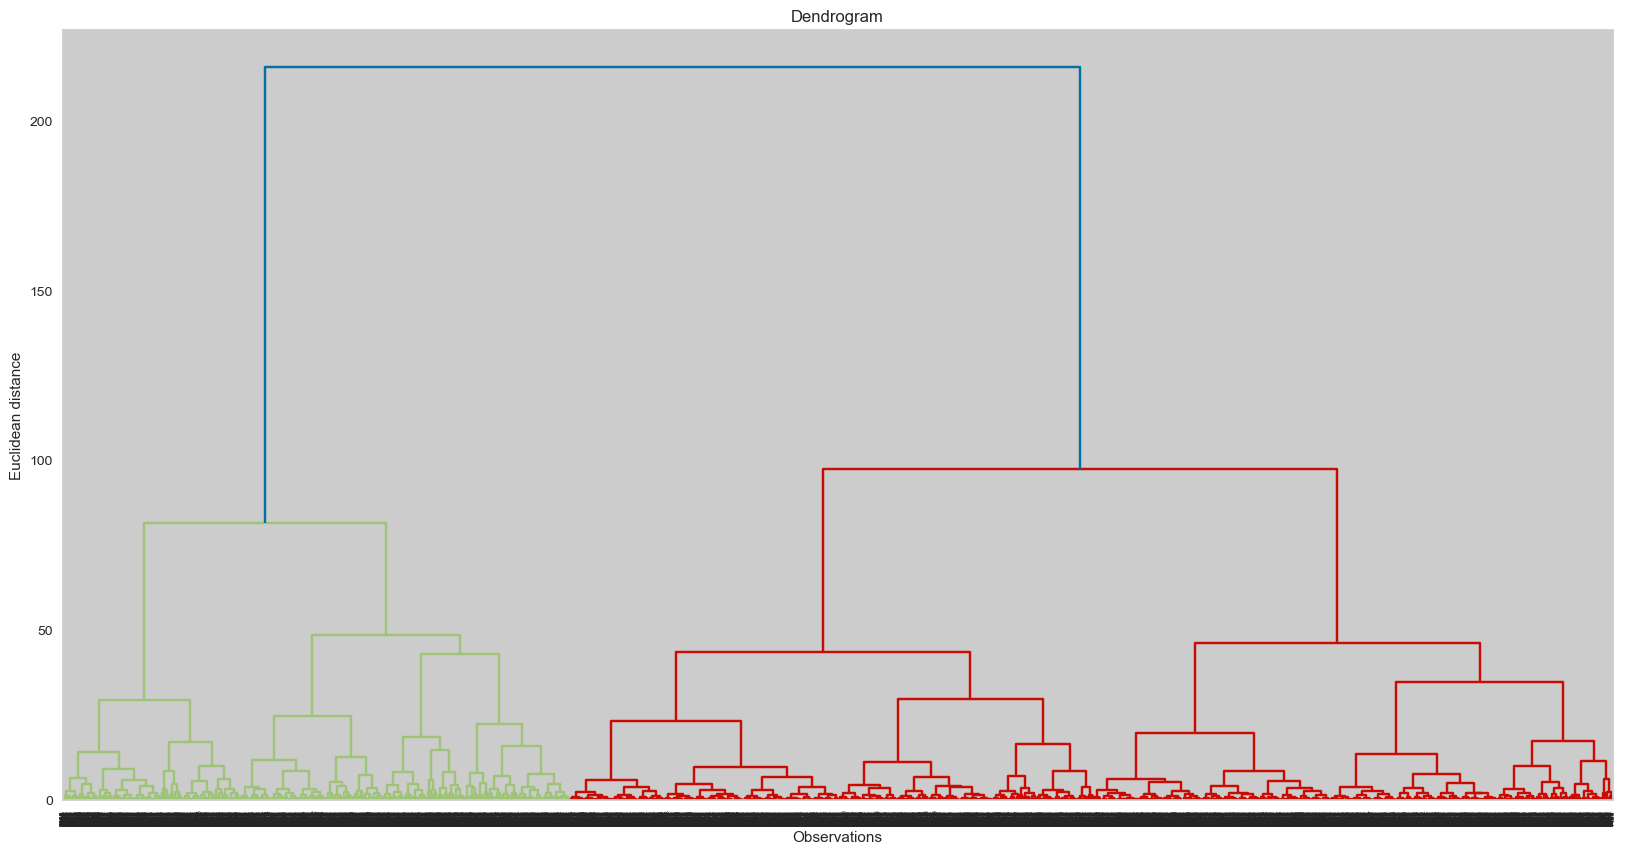

In [218]:
# Making the dendrogram to find the optimal number of clusters
plt.figure(figsize=(20,10))

dendogram = ch.dendrogram(ch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Euclidean distance')
plt.show()

In [219]:
# Hierarchical Clustering Model
n_clusters = 2
model = AgglomerativeClustering(n_clusters, affinity = 'euclidean', linkage = 'ward')
model.fit(X)

AgglomerativeClustering(affinity='euclidean')

In [220]:
Y = model.fit_predict(X)
Y

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

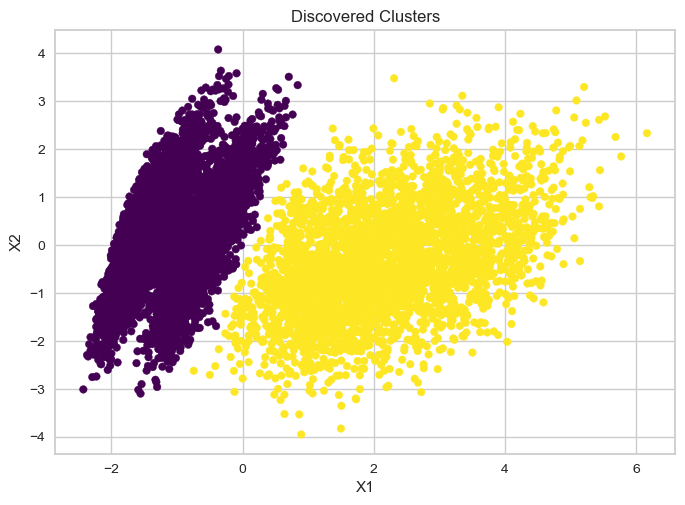

In [221]:
# Visualising the clusters
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap='viridis')
plt.title('Discovered Clusters')
plt.xlabel('X1')
plt.ylabel('X2')
# plt.legend()
plt.show()

In [222]:
hc = model.fit_predict(X)
print("Hierarchical Silhouette Score:", silhouette_score(X, hc))

Hierarchical Silhouette Score: 0.5423524458665157


### K-means

In [223]:
# KMeans Clustering Model
# Extracting the features
X_kmeans = X
X_kmeans

array([[-0.7659026 , -1.10574605],
       [-1.50541863,  0.13107567],
       [ 2.06172404, -1.19327627],
       ...,
       [-1.16882945,  1.47469708],
       [ 4.15803616, -0.07773337],
       [ 1.7022317 , -2.00710804]])

In [224]:
# Using the elbow method to find the optimal number of clusters
distortions = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k, n_init=10).fit(X_kmeans)
    model.fit(X_kmeans)
    distortions.append(sum(np.min(cdist(X_kmeans, model.cluster_centers_, 'euclidean'), axis=1)) / X_kmeans.shape[0]) 
print("Distortion: ", distortions)

Distortion:  [1.157400515182147, 0.9454176942869228, 0.8261124329322742, 0.7490237537371371, 0.7054483567881824, 0.6691597262520844, 0.6077598302339284, 0.5721295748008323]


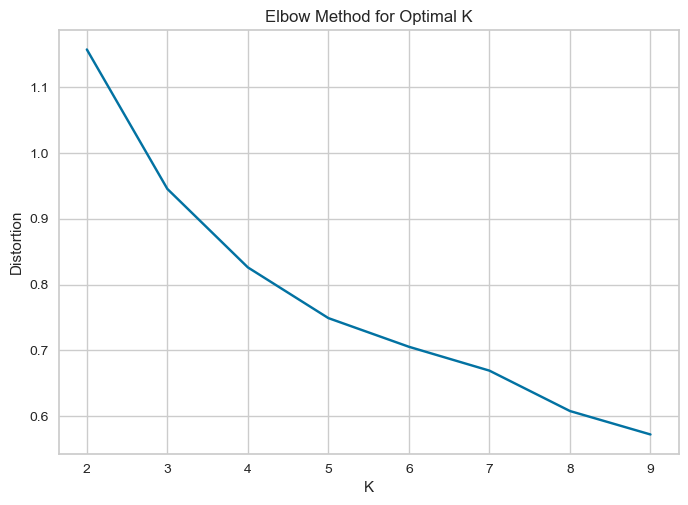

In [225]:
# Plotting the elbow method
plt.title('Elbow Method for Optimal K')
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

In [226]:
k_clusters = 4

In [227]:
kmeans = KMeans(init='k-means++', n_clusters=k_clusters, n_init=20)

In [228]:
kmeans.fit(X_kmeans)

KMeans(n_clusters=4, n_init=20)

In [229]:
# Silhouette score for KMeans clustering for different number of clusters
scores = []
K = range(2, 10)
for k in K:
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(X_kmeans)
    score = metrics.silhouette_score(X_kmeans, model.labels_, metric='euclidean', sample_size=len(X_kmeans))
    print("\nNumber of clusters =", k)
    print("Silhouette score =", score)
    scores.append(score)


Number of clusters = 2
Silhouette score = 0.5493254518573263

Number of clusters = 3
Silhouette score = 0.42617621458340255

Number of clusters = 4
Silhouette score = 0.4184236962997743

Number of clusters = 5
Silhouette score = 0.36412027255815155

Number of clusters = 6
Silhouette score = 0.3467953226438819

Number of clusters = 7
Silhouette score = 0.35639029787525633

Number of clusters = 8
Silhouette score = 0.37039735499765386

Number of clusters = 9
Silhouette score = 0.35267029166915115


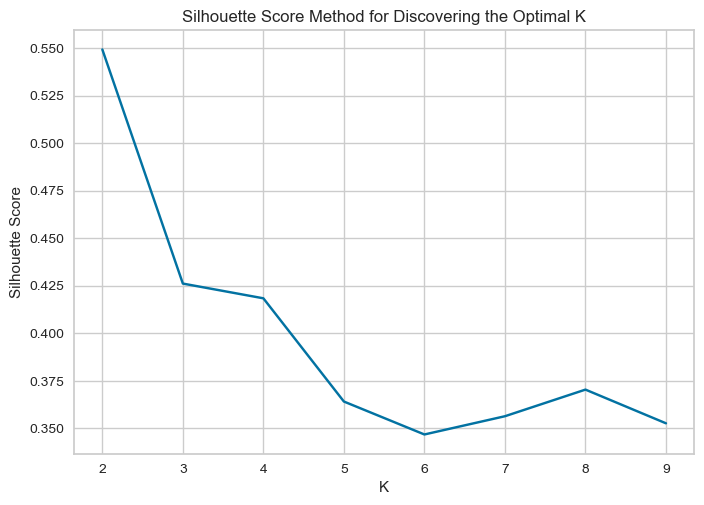

In [230]:
# Plot the elbow
plt.title('Silhouette Score Method for Discovering the Optimal K')
plt.plot(K, scores, 'bx-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

In [231]:
y = kmeans.predict(X_kmeans)
y

array([0, 0, 3, ..., 2, 1, 3])

In [232]:
print(kmeans.labels_)

[0 0 3 ... 2 1 3]


Cluster  0 :  (3612, 2)


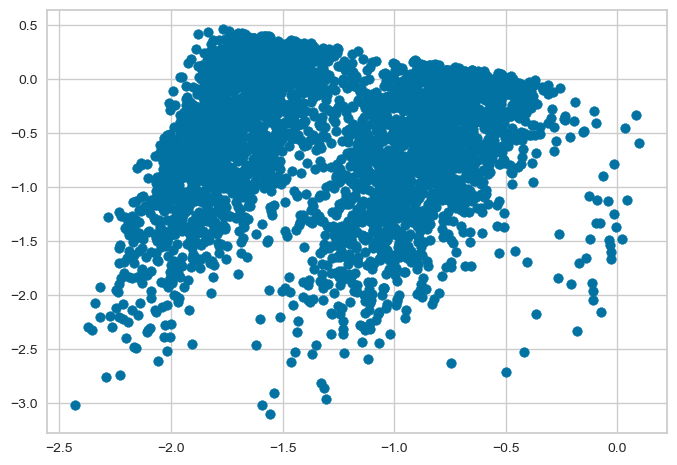

Cluster  1 :  (1362, 2)


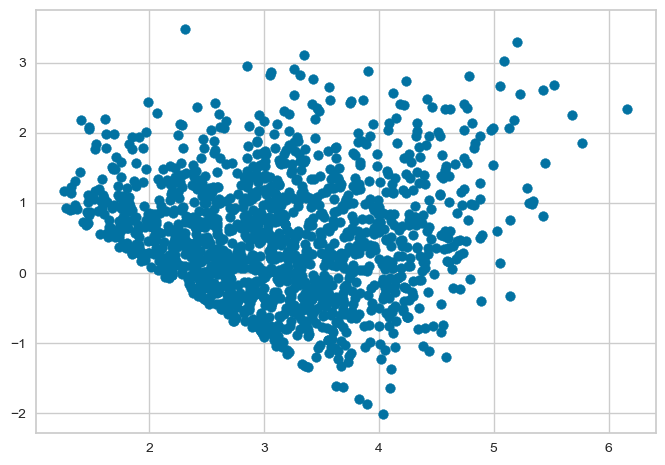

Cluster  2 :  (3207, 2)


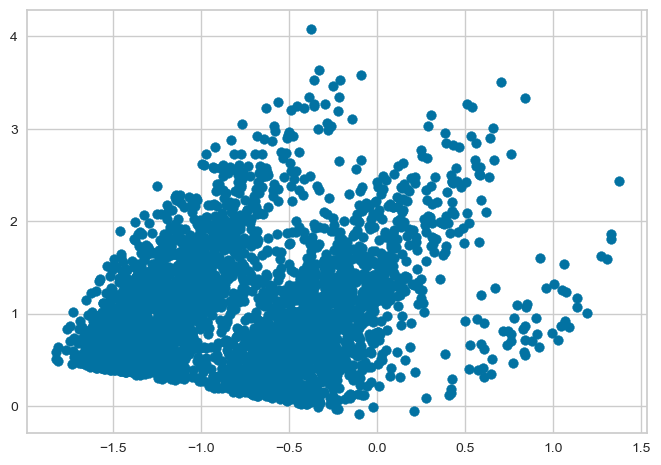

Cluster  3 :  (1819, 2)


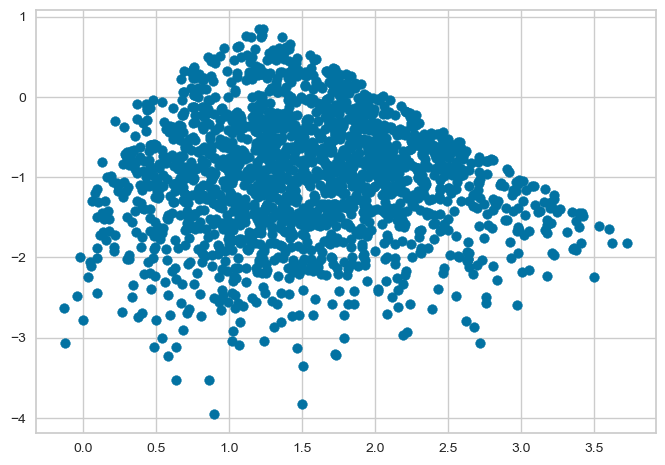

In [233]:
# Visualising the endividual clusters
for i in range(k_clusters):
    # slice the cluster
    cluster = X_kmeans[y == i]    
    # print the shape
    print("Cluster ", i, ": ", cluster.shape)    
    # plot the points of this cluster
    plt.scatter(cluster[:, 0], cluster[:, 1])   
    plt.grid(True)
    plt.show()

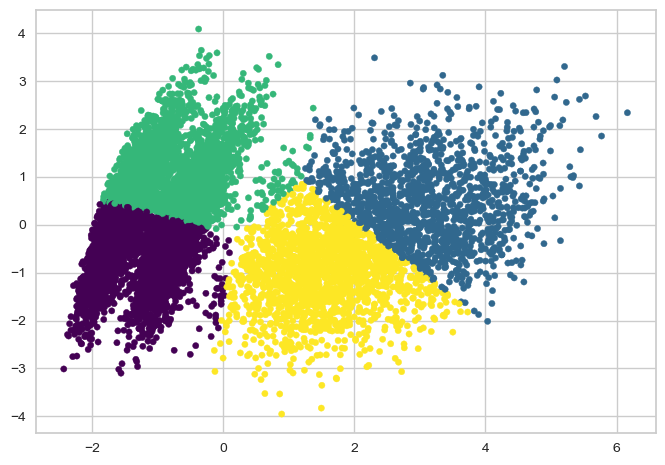

In [234]:
# Visualising all the clusters
plt.scatter(X_kmeans[:, 0], X_kmeans[:, 1], c=y, s=20, cmap='viridis')
plt.grid(True)
plt.show()

In [235]:
print(kmeans.cluster_centers_)

[[-1.2968248  -0.62053287]
 [ 3.11900887  0.4995465 ]
 [-0.73389614  1.05621564]
 [ 1.52489296 -1.01142455]]


In [236]:
k = 5
model = KMeans(n_clusters=k, n_init=10)
model.fit_predict(X_kmeans)

array([4, 0, 3, ..., 2, 1, 3])

In [237]:
score = silhouette_score(X_kmeans, model.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.364


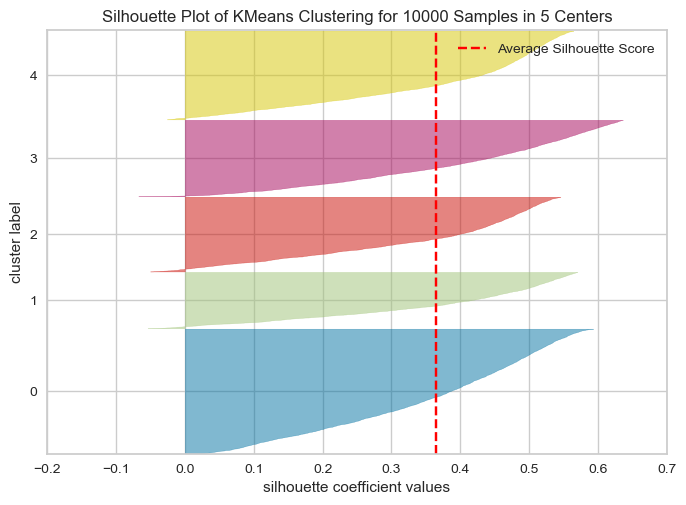

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 10000 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [238]:
# Visualizing the Silhouette Score
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_kmeans)
visualizer.show()  

In [239]:
# Extracting the features
x_ms = X

In [240]:
# Estimate the bandwidth of the data
bandwidth = estimate_bandwidth(x_ms, quantile=0.2, n_samples=200)
bandwidth 

1.34660958018756

In [241]:
# Making the instance of the MeanShift model
msmodel = MeanShift(bandwidth=bandwidth, bin_seeding=True)
msmodel.fit(x_ms)

MeanShift(bandwidth=1.34660958018756, bin_seeding=True)

In [242]:
# Getting the labels
labels = msmodel.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
n_clusters_

2

In [243]:
cluster_centers = msmodel.cluster_centers_
cluster_centers
# Predict the cluster for all the samples
Y = msmodel.predict(x_ms)
Y

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

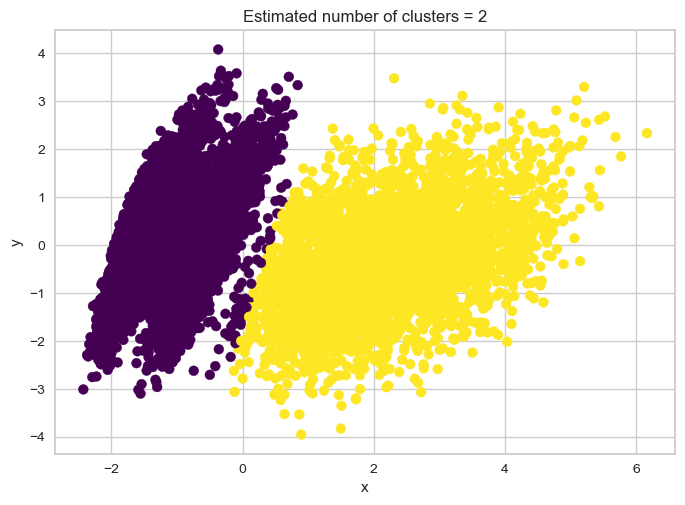

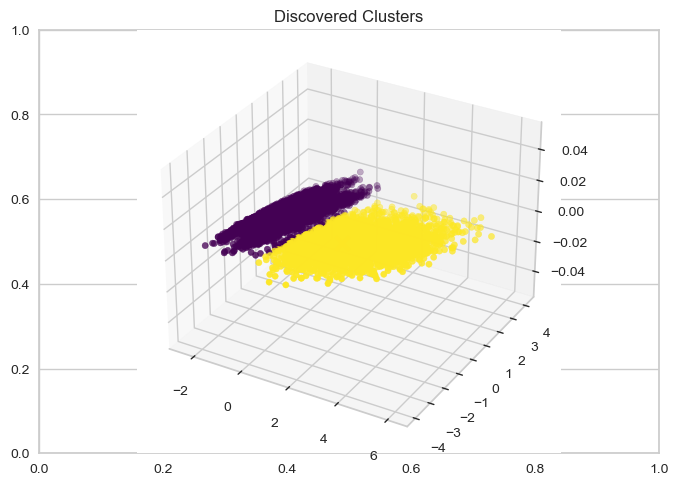

In [244]:
len(msmodel.labels_)

# s - marker size, here, the dots size
# c - marker color, here taken from the predicted clusters
plt.scatter(x_ms[:,0], x_ms[:,1], s=50, c=labels, cmap='viridis')
plt.title(f'Estimated number of clusters = {n_clusters_}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Visualising the clusters in 3D
import plotly.express as px


df_3d = pd.DataFrame(x_ms, columns=['x', 'y'])
df_3d['label'] = labels
# Create a 3D scatter plot
fig = px.scatter_3d(df_3d, x='x', y='y', z='label', color='label', symbol='label')
fig.show()



fig = plt.figure()
plt.title('Discovered Clusters')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_ms[:,0], x_ms[:,1],  marker='o', cmap='viridis', c=labels)
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], marker='x', 
           color='red', s=100, linewidth=3, zorder=10)
plt.show()

#### Multible cluster model testing

K-means Silhouette Score: 0.7272517673342564
K-means Davies-Bouldin Index: 0.47170236271604965


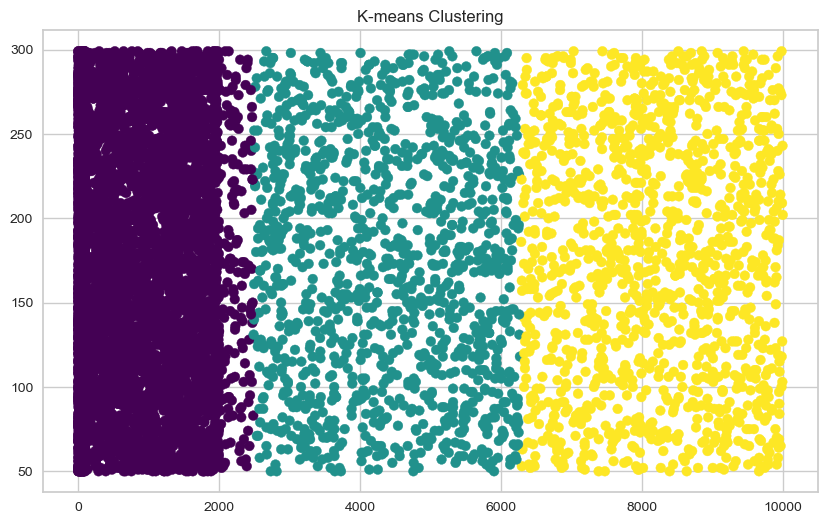


Hierarchical Silhouette Score: 0.6987582302409265
Hierarchical Davies-Bouldin Index: 0.48067426292775245


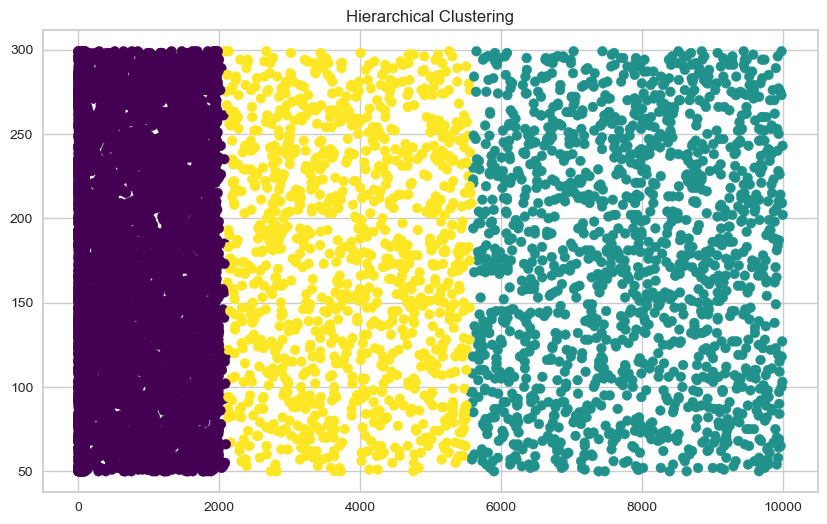


DBSCAN Silhouette Score:


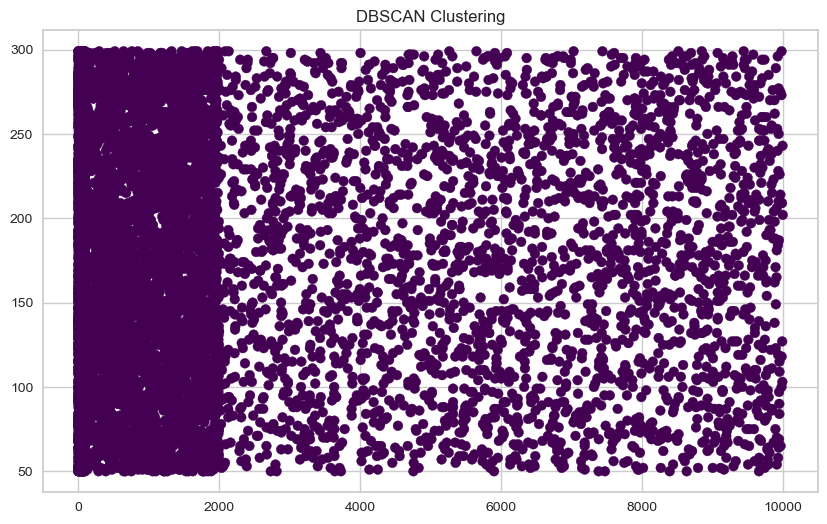


Mean Shift Silhouette Score: 0.5972466963485201
Mean Shift Davies-Bouldin Index: 0.5220474785135396


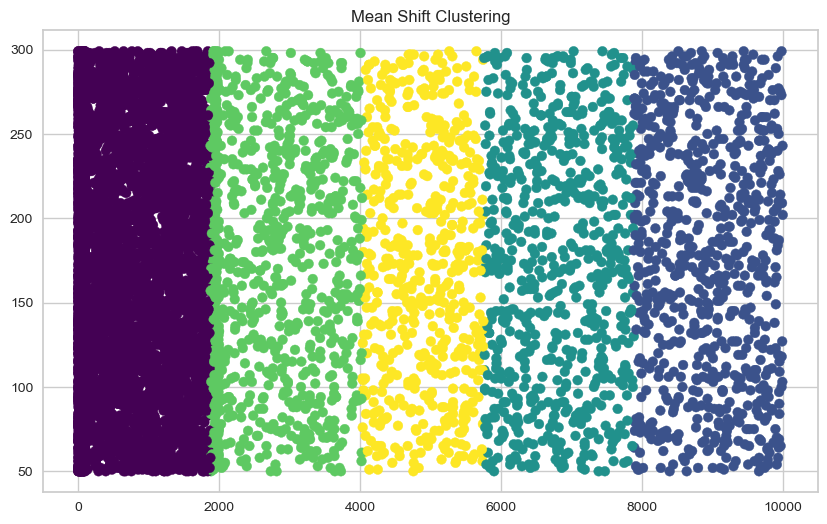

In [245]:
# Feature selection
data_scaled = df_numeric[['Vehicle Monthly Distance Km', 'Monthly Grocery Bill', 'Waste Bag Weekly Count', 'How Long TV PC Daily Hour', 'How Many New Clothes Monthly', 'How Long Internet Daily Hour']]
data_scaled = data_scaled.values

# Initialize the models for clustering (KMeans, Hierarchical, DBSCAN, Mean Shift) 
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_clusters = kmeans.fit_predict(data_scaled)

hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_clusters = hierarchical.fit_predict(data_scaled)

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(data_scaled)

bandwidth = estimate_bandwidth(data_scaled, quantile=0.2, n_samples=500)
mean_shift = MeanShift(bandwidth=bandwidth)
mean_shift_clusters = mean_shift.fit_predict(data_scaled)


# Evaluate the models using Silhouette Score and Davies-Bouldin Index, and visualize the clusters
print("K-means Silhouette Score:", silhouette_score(data_scaled, kmeans_clusters))
print("K-means Davies-Bouldin Index:", davies_bouldin_score(data_scaled, kmeans_clusters))

plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans_clusters, cmap='viridis')
plt.title('K-means Clustering')
plt.show()

print()
print("Hierarchical Silhouette Score:", silhouette_score(data_scaled, hierarchical_clusters))
print("Hierarchical Davies-Bouldin Index:", davies_bouldin_score(data_scaled, hierarchical_clusters))

plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=hierarchical_clusters, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.show()


print()

print("DBSCAN Silhouette Score:")

plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=dbscan_clusters, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

print()

print("Mean Shift Silhouette Score:", silhouette_score(data_scaled, mean_shift_clusters))
print("Mean Shift Davies-Bouldin Index:", davies_bouldin_score(data_scaled, mean_shift_clusters))

plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=mean_shift_clusters, cmap='viridis')
plt.title('Mean Shift Clustering')
plt.show()


#### Clustering summary:

We have try using K-means, Hierarchical clustering, DBSCAN & Mean shift to see if there are any patterns in the data, but it seems that there are no clear patterns in the data, when applying these clustering methods to the hole dataset. We have tried with and without scaling the data. Additionally, we have tried to use different numbers of clusters, but the results are still the same. 
This is concluded based on the visualisation of the clusters from the different methods due to the visualistations being porly; However, the silhouette score have actually been quite high, which indicates that there are some patterns in the data.

Silhouette score (without scaling and pca):
* K-means: 0.727 (with 2 clusters), 0.624 (with 3 clusters)
* Hierarchical clustering: 0.426
* Mean shift: 0.727
* DBSCAN: indicates one clusters in the data

Silhouette score (without scaling and pca):
* K-means: 0.549 (2 clusters), 0.426 (3 clusters)
* Hierarchical clustering: 0.542 (2 clusters)

We have also tried using only some parts of the datas features, these results are gives som visualisation endication of patterns.
The features used for the clustering are: 'Monthly Grocery Bill', 'Waste Bag Weekly Count', 'How Long TV PC Daily Hour', 'How Many New Clothes Monthly', 'How Long Internet Daily Hour'

Silhouette score (without scaling and pca):
* K-means: 0.79 (with 2 clusters), 0.727 (with 3 clusters)
* Hierarchical clustering: 0.698
* Mean shift: 0.597
* DBSCAN: indicates one clusters in the data

Other features combinations have also been tried, but the results gives similar visualisation and silhouette score.

## Conclusion

Theres much interesing information in exploring this dataset, and we can definetely find a lot of patterns that is crucial for identifying which personal lifestyle factors are significant when it comes to calculationg our total carbon emission output.

**Here is our discoveries summarized:**

- The most significant factors for an individuals carbon emission seem to be their choice of transport. People that drive many kilometers monthly in personal vehicles are also the one who have a tendency to have the highest carbon emissions.

- Theres a small indication that internet usage has an impact on carbon emissions to correlating factors, but no direct pattern can be concluded, so we deem it as insignificant

- There seem to be very little difference in the correlating factors between males and females

- People who see themselves as 'Energy efficient' only seem the emit about 1,5% less carbon than people who say they're 'Not energy efficient', which we conclude makes it insignificant

- People who travel with airplanes very frequently seem to emit around 22% more carbon on average, than people who never fly

We tried to use different classification machine learning methods to try and predict carbon output based on correlating factors, and clustering methods for trying to discov hidden patterns in the data.

For classification we tried:

- Naive Bayes classifier
- Decision Tree classifier
- Random Forest classifier

We tried several iterations for optimizing the models by adjusting the category amount and the normalisation of the input data. In the end, the RFC model was the most succesful, with an accuracy of aaround 92% with 3 categories. However, we deem the result as unsaticfactory, since the input data still is a bit unsuited for this kind of machine learning, with 92% of the data fitting into a single category. The good accuracy is due to overfitting.
On the last iteration we tried to divide the categories by quantiles, which made the model drop to 67% accuracy, but is a way more useful and less overfitted model.

For clustering we tried: 
- K-means
- Hierarchical clustering
- DBSCAN 
- Mean shift. 

These clustering models revealed no significant patters in the data, with the DBSCAN resulting in an optimal cluster amount of 1. Higest silhouette score was 0.79 for K-means with 2 clusters; however the visulaization of the clusters from the different models were poor, didnt give any further insight to the data in the form of given patterns. Only way to get better visualizations, was to use specific features and not the hole dataset. This was without a doubt one of the challenges in the project development.